In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
# Connection information
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'heartdisease'

In [3]:
# Establish connection
connection = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

# Create dataframe
heartdisease_df = pd.read_sql_query('select * from heartdisease', con=connection)

# Terminate connection
connection.dispose()

In [5]:
# Define features and outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values
X = X.replace(to_replace='?', value=0)

# Binarize
y = np.where(y > 0, 0, 1)

In [6]:
# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
def visual(X, cluster):
    pca = PCA(n_components=2).fit_transform(X)

    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
                )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

### Different values for ```eps``` and ```min_samples``` 

DBSCAN: eps 1 and min_samples 4


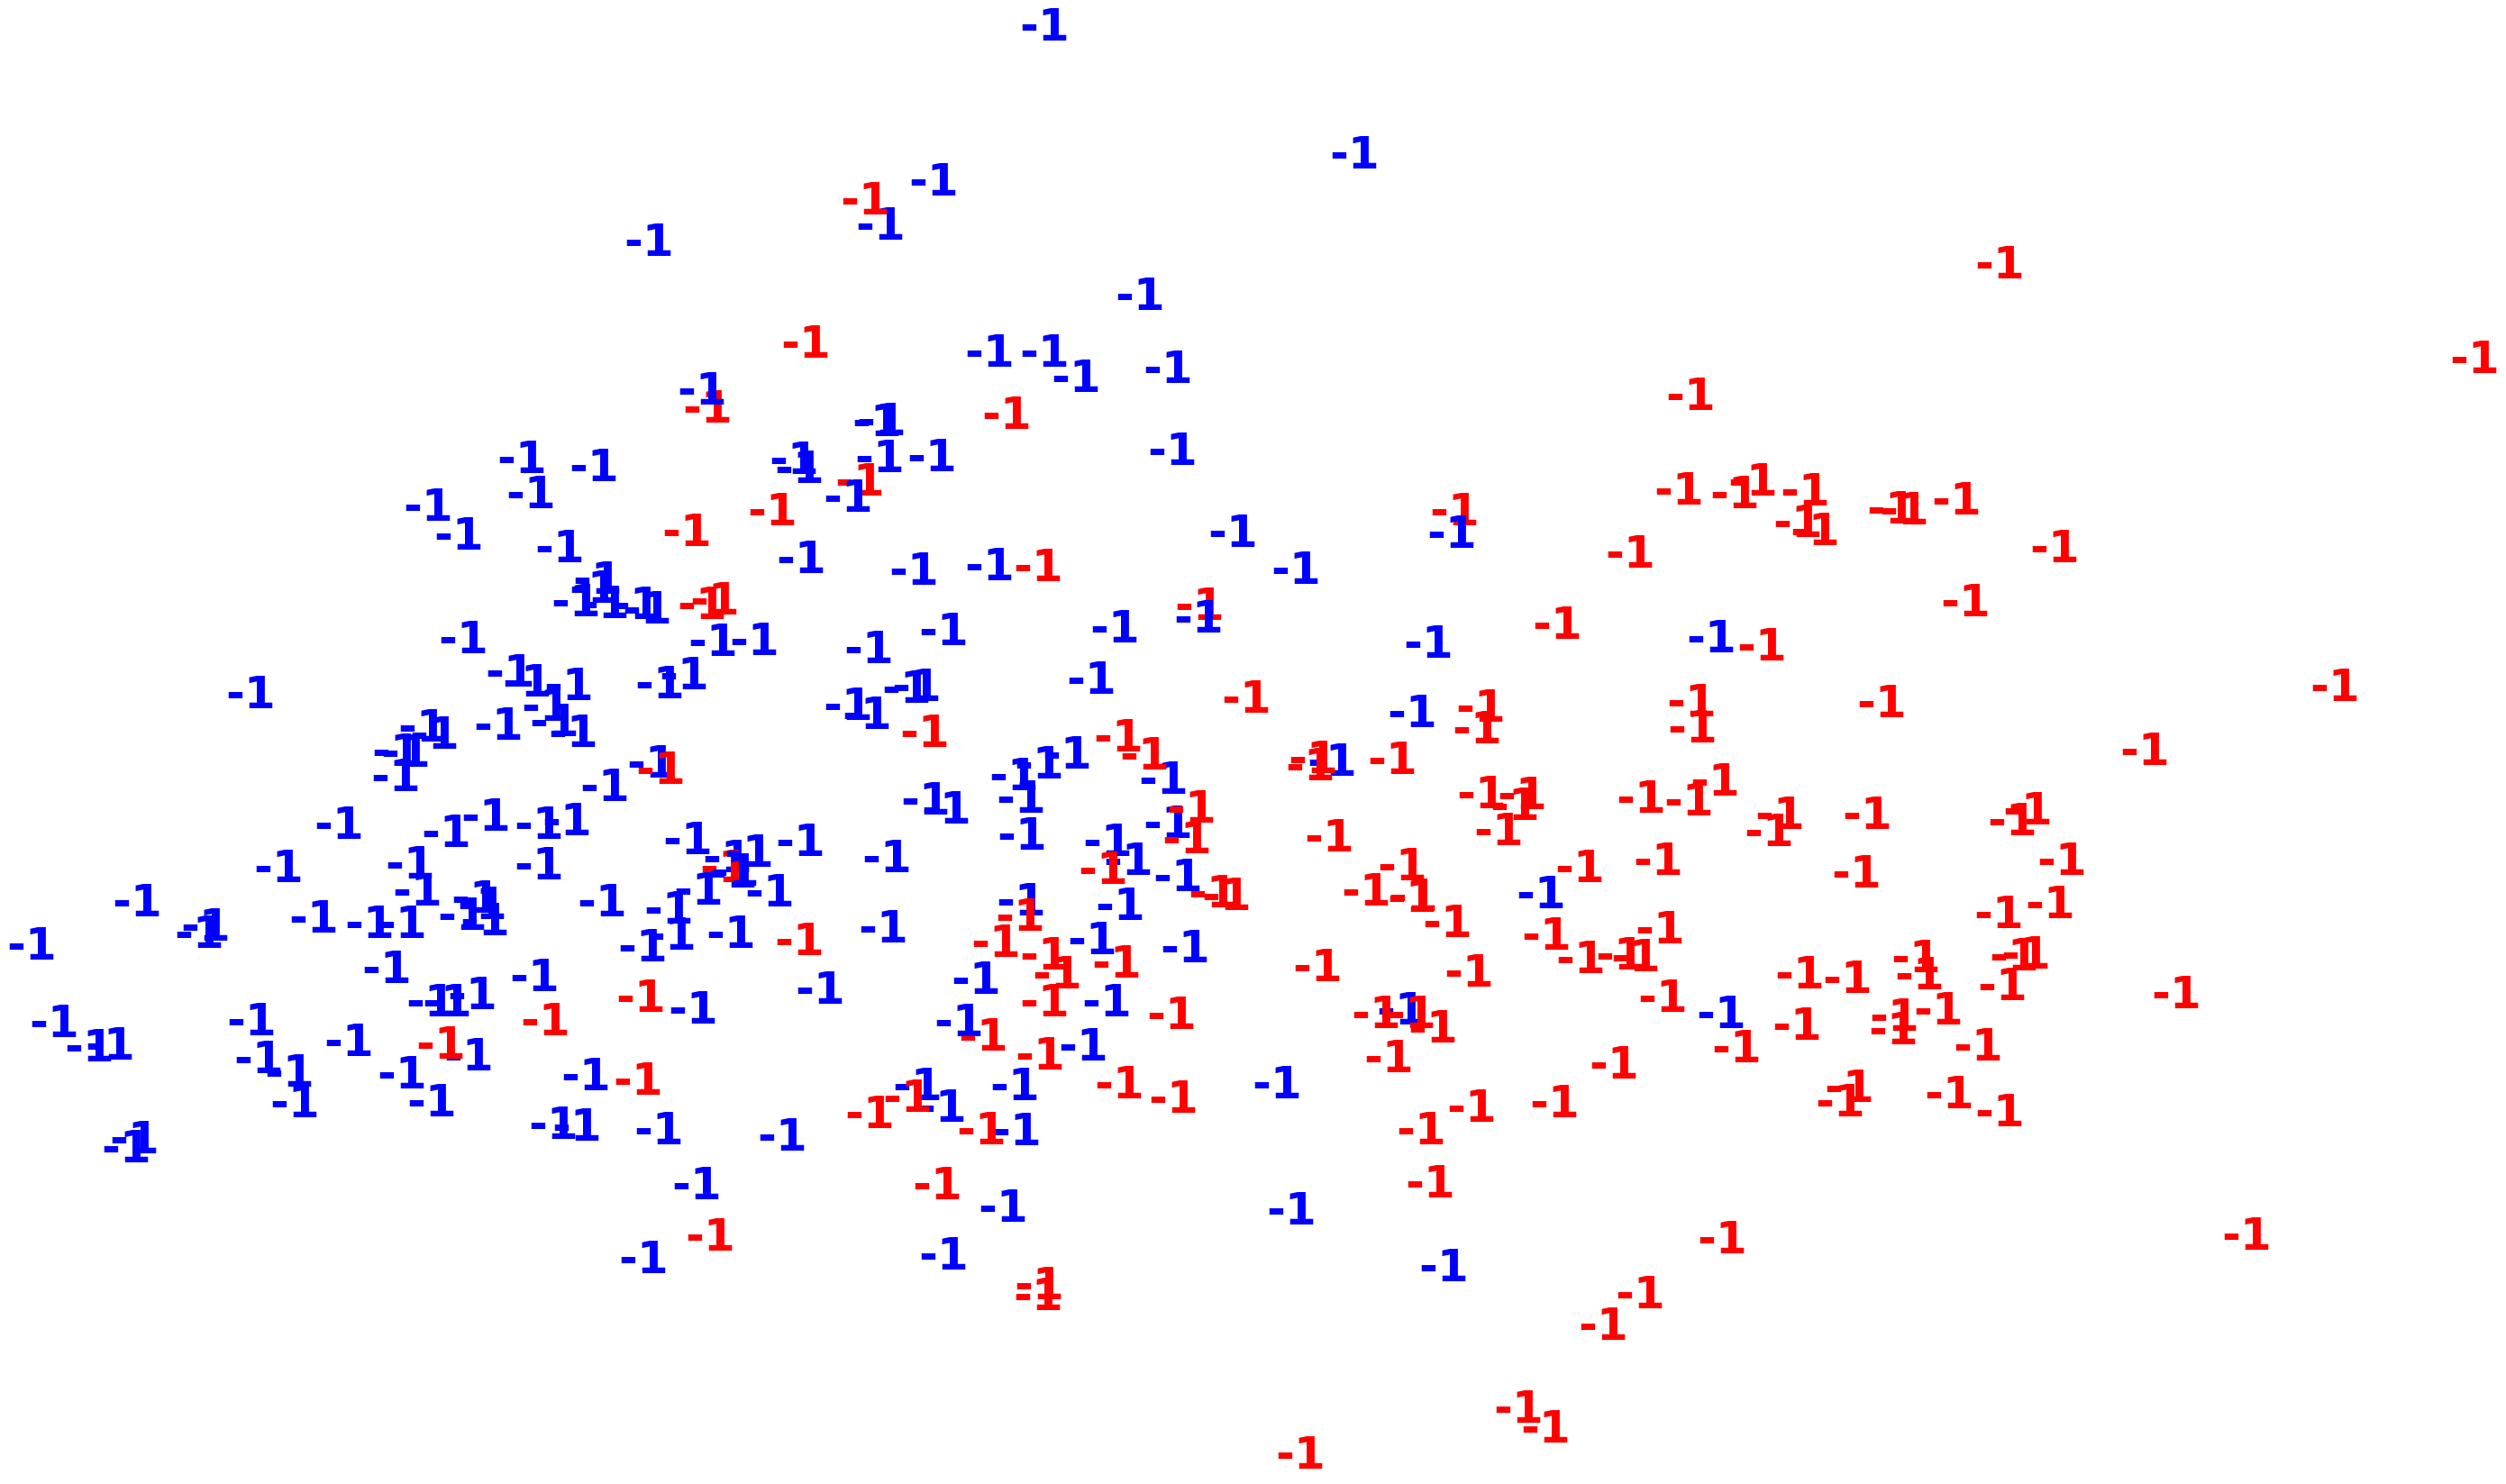

DBSCAN: eps 2 and min_samples 5


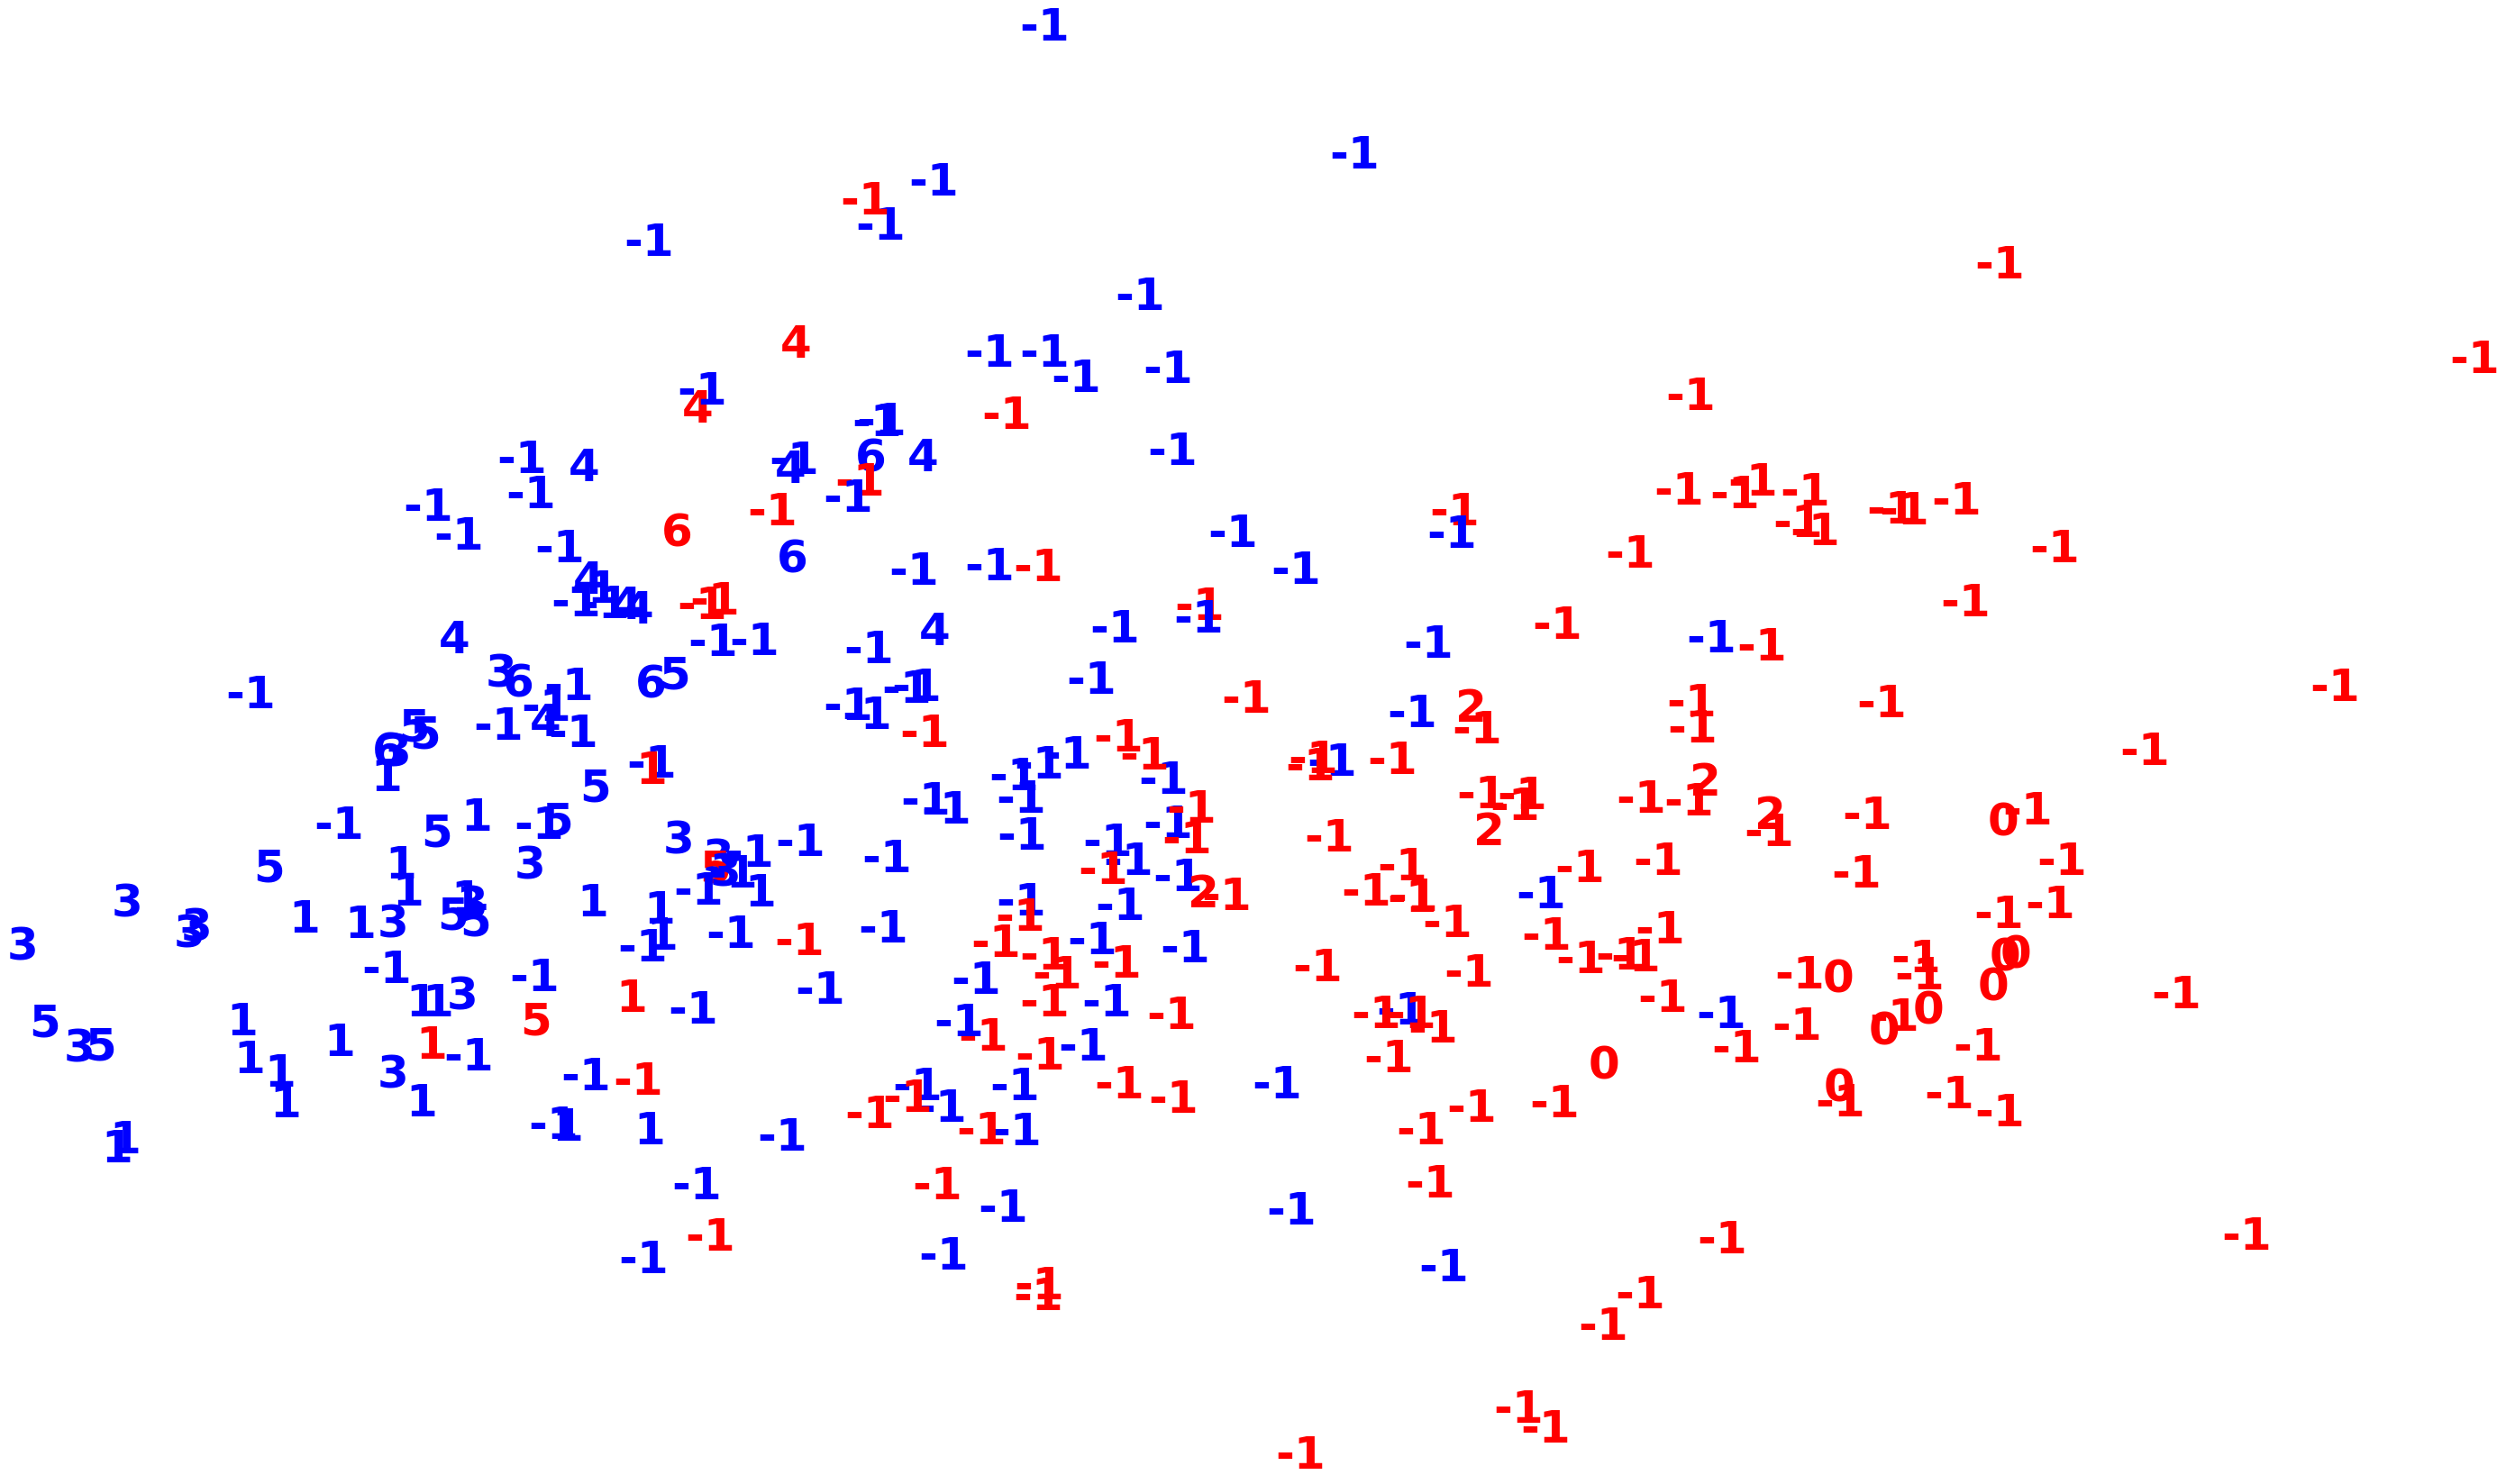

DBSCAN: eps 3 and min_samples 6


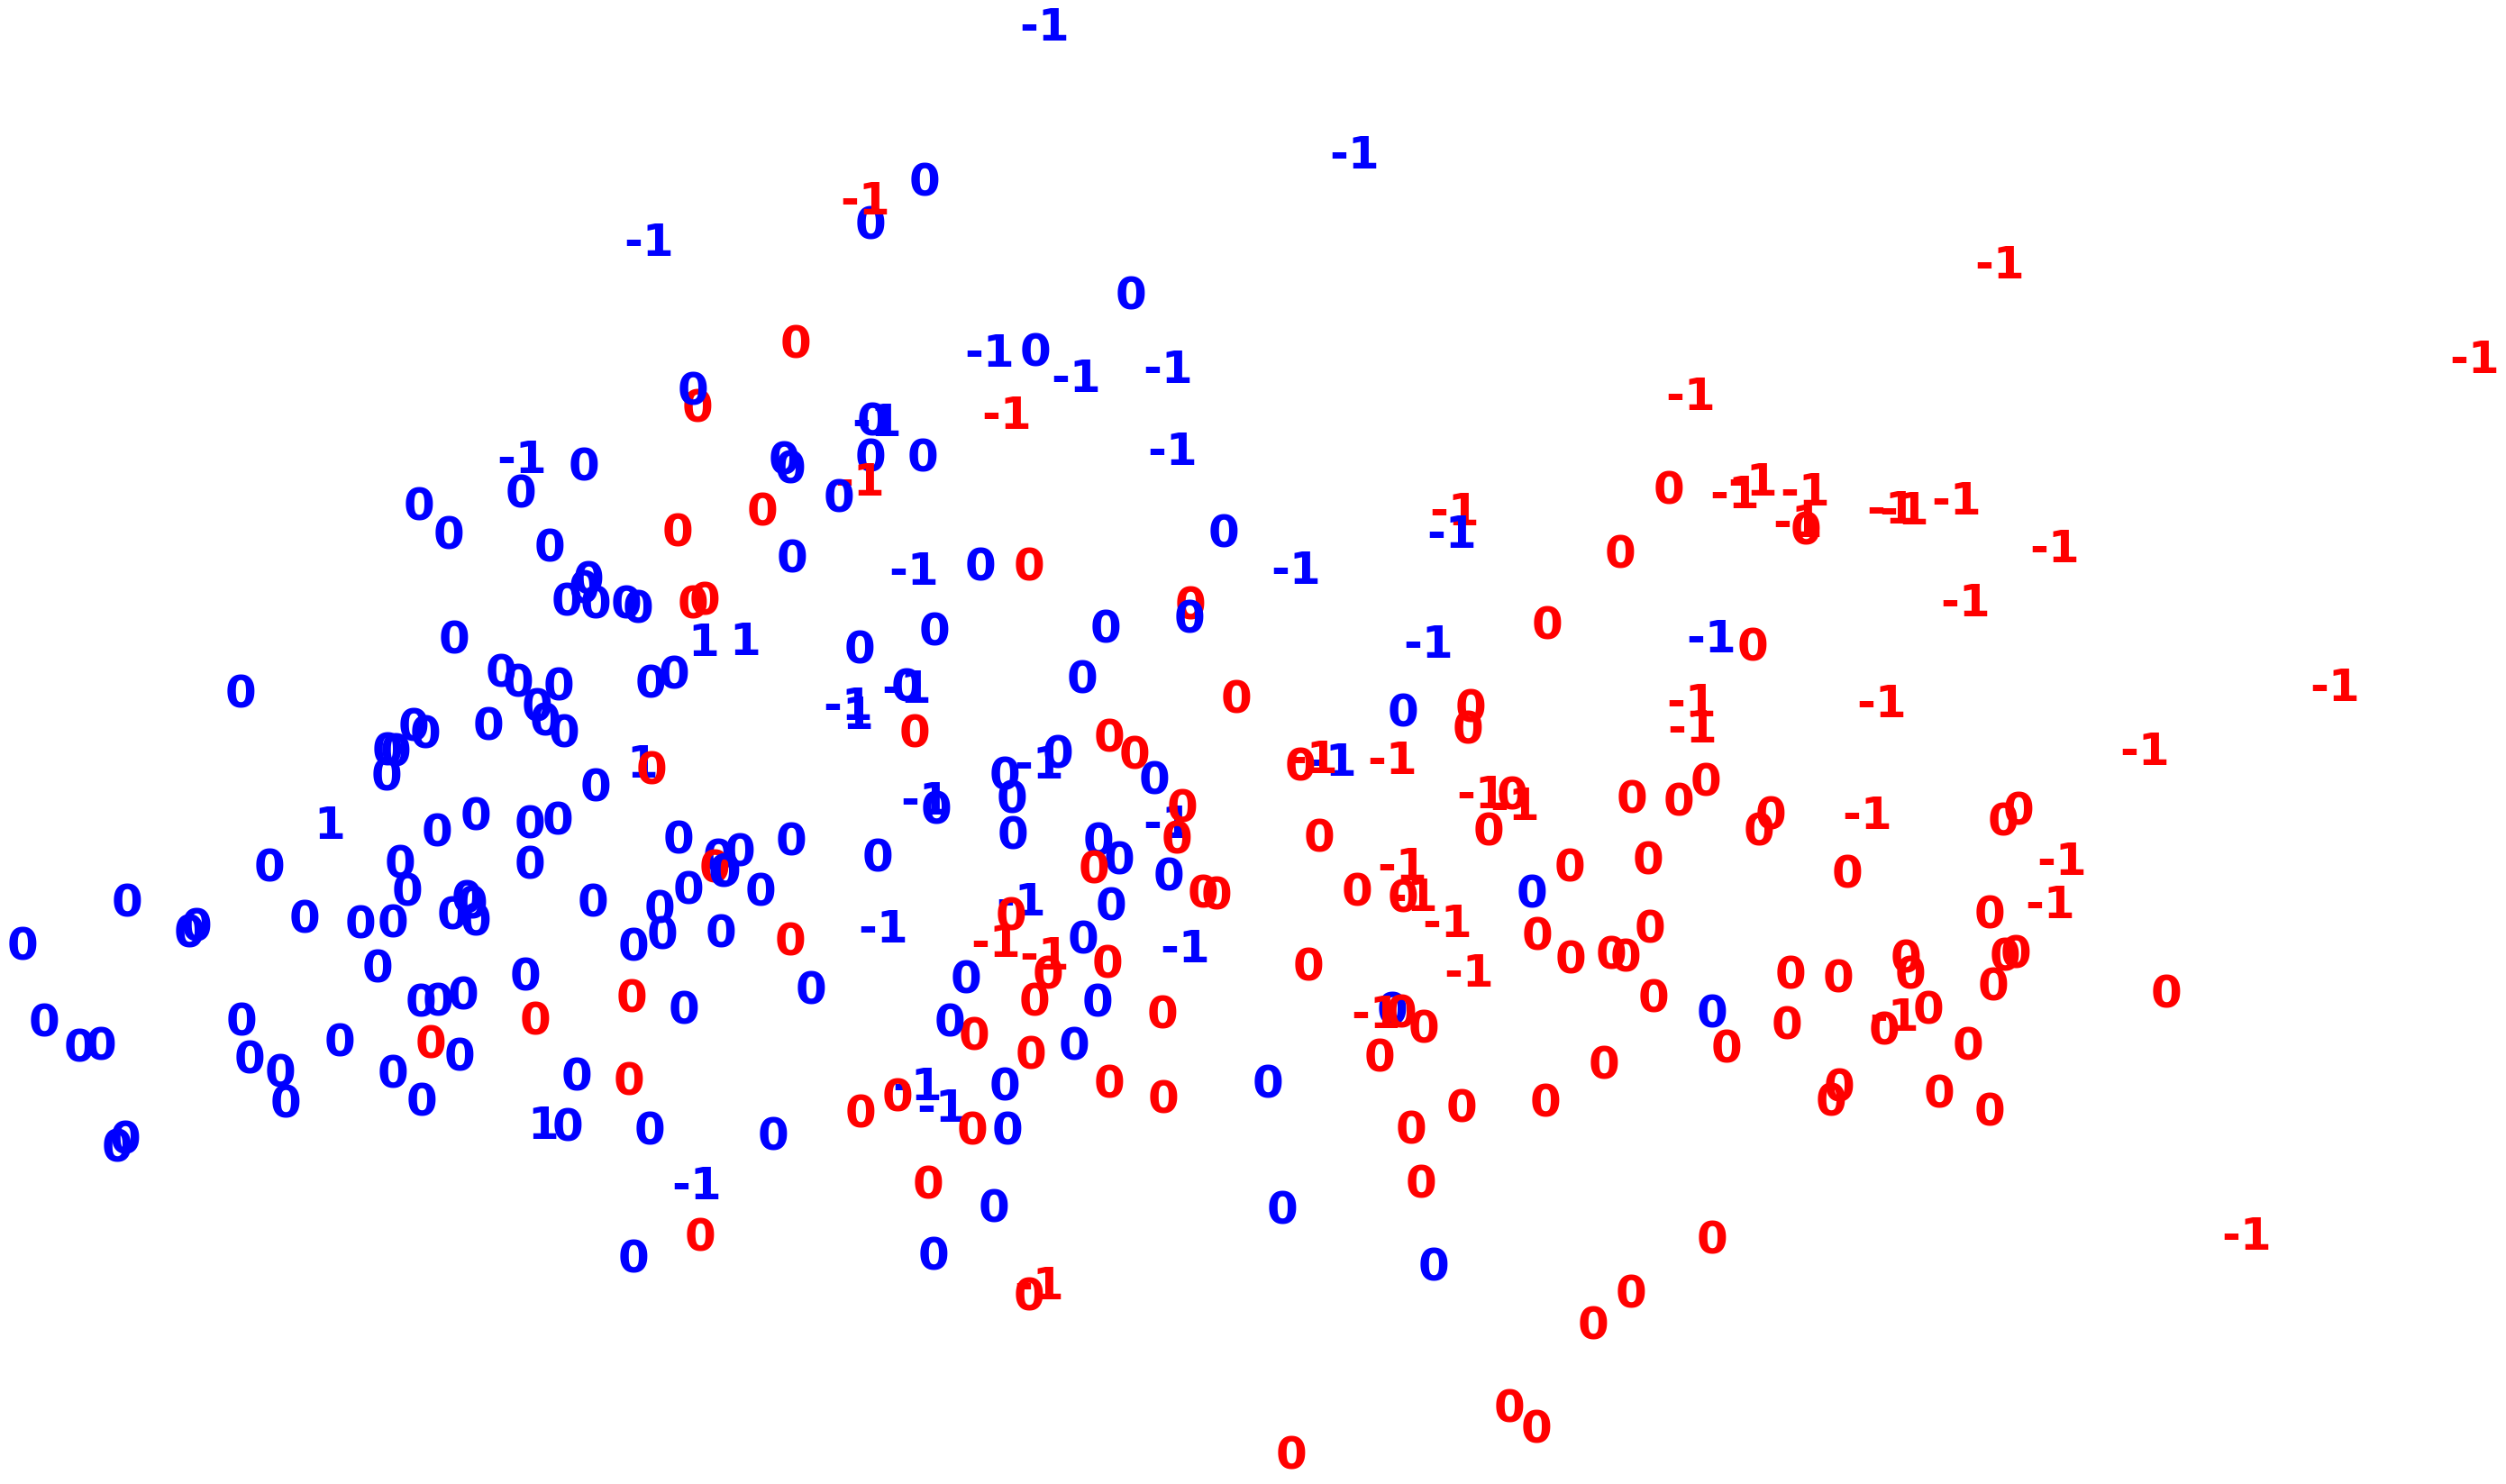

DBSCAN: eps 4 and min_samples 7


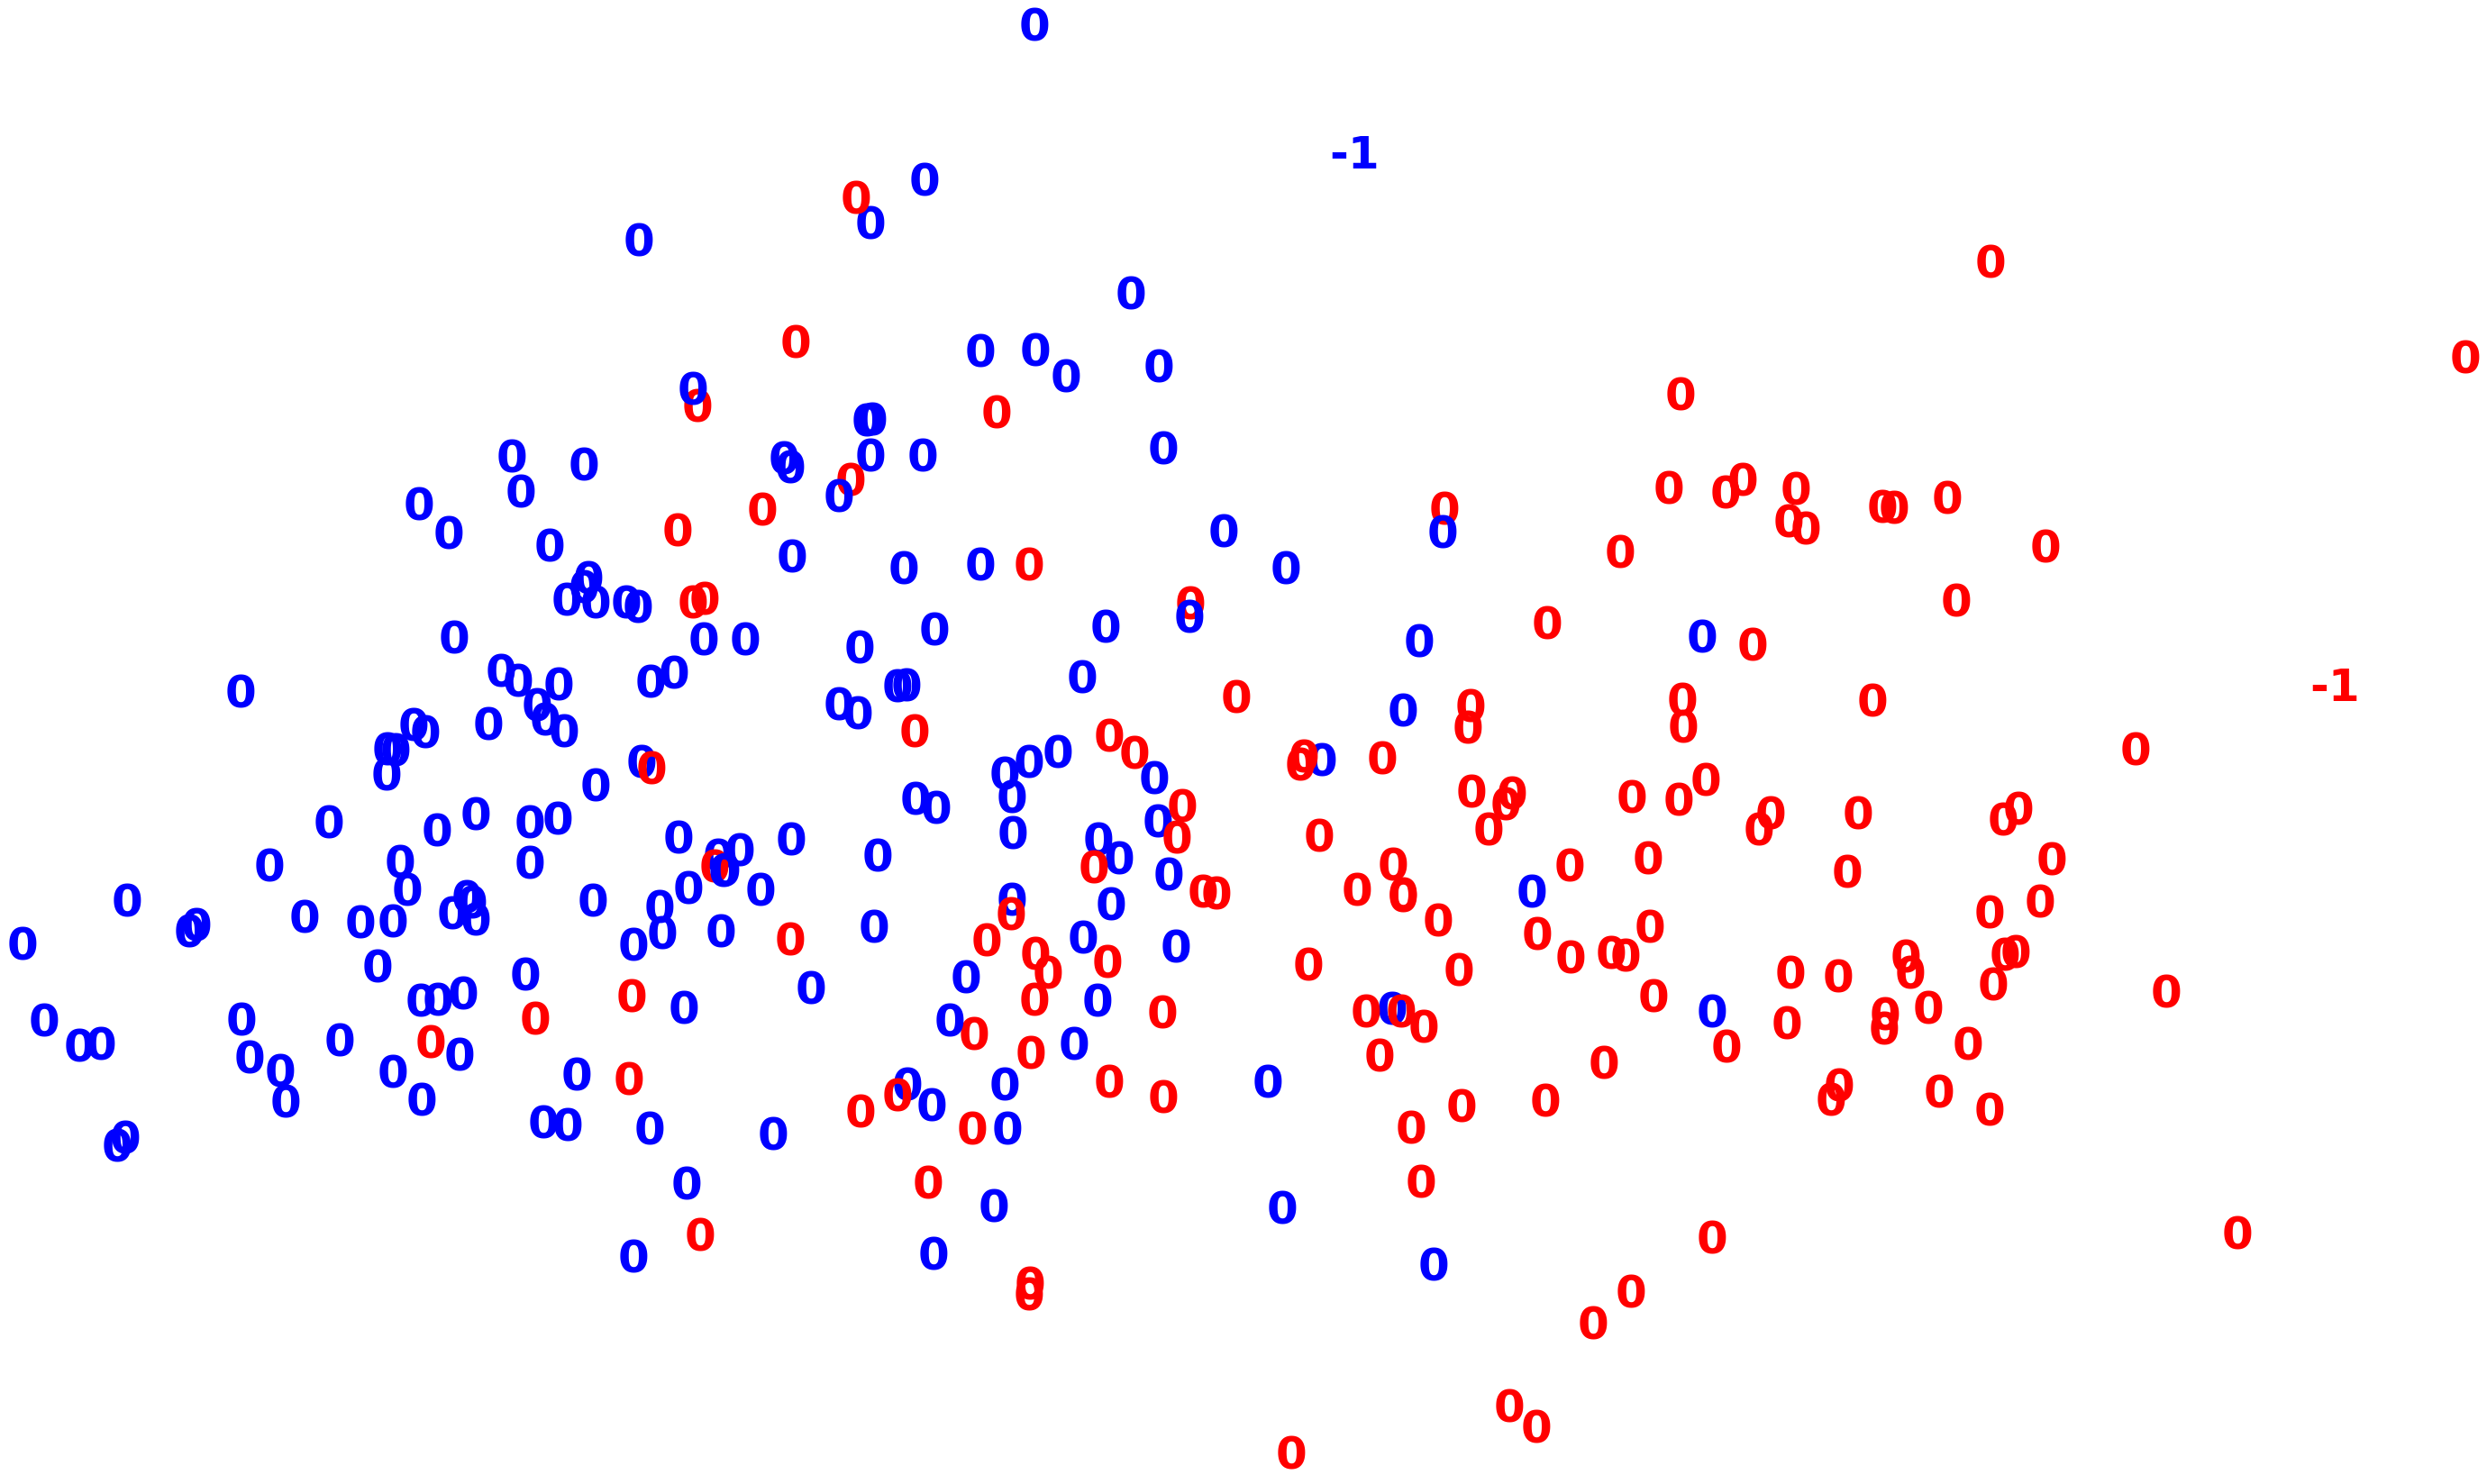

In [8]:
eps = [1, 2, 3, 4]
min_samples = [4, 5, 6, 7]

for eps, min_sample in zip(eps, min_samples):

    # Define cluster
    dbscan_cluster = DBSCAN(eps=eps, min_samples=min_sample)

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    
    print('DBSCAN: eps {} and min_samples {}'.format(eps, min_sample))
    
    # Visual
    visual(X_std, clusters)

### Increasing values for ```min_samples``` 

DBSCAN: eps 1 and min_samples 1


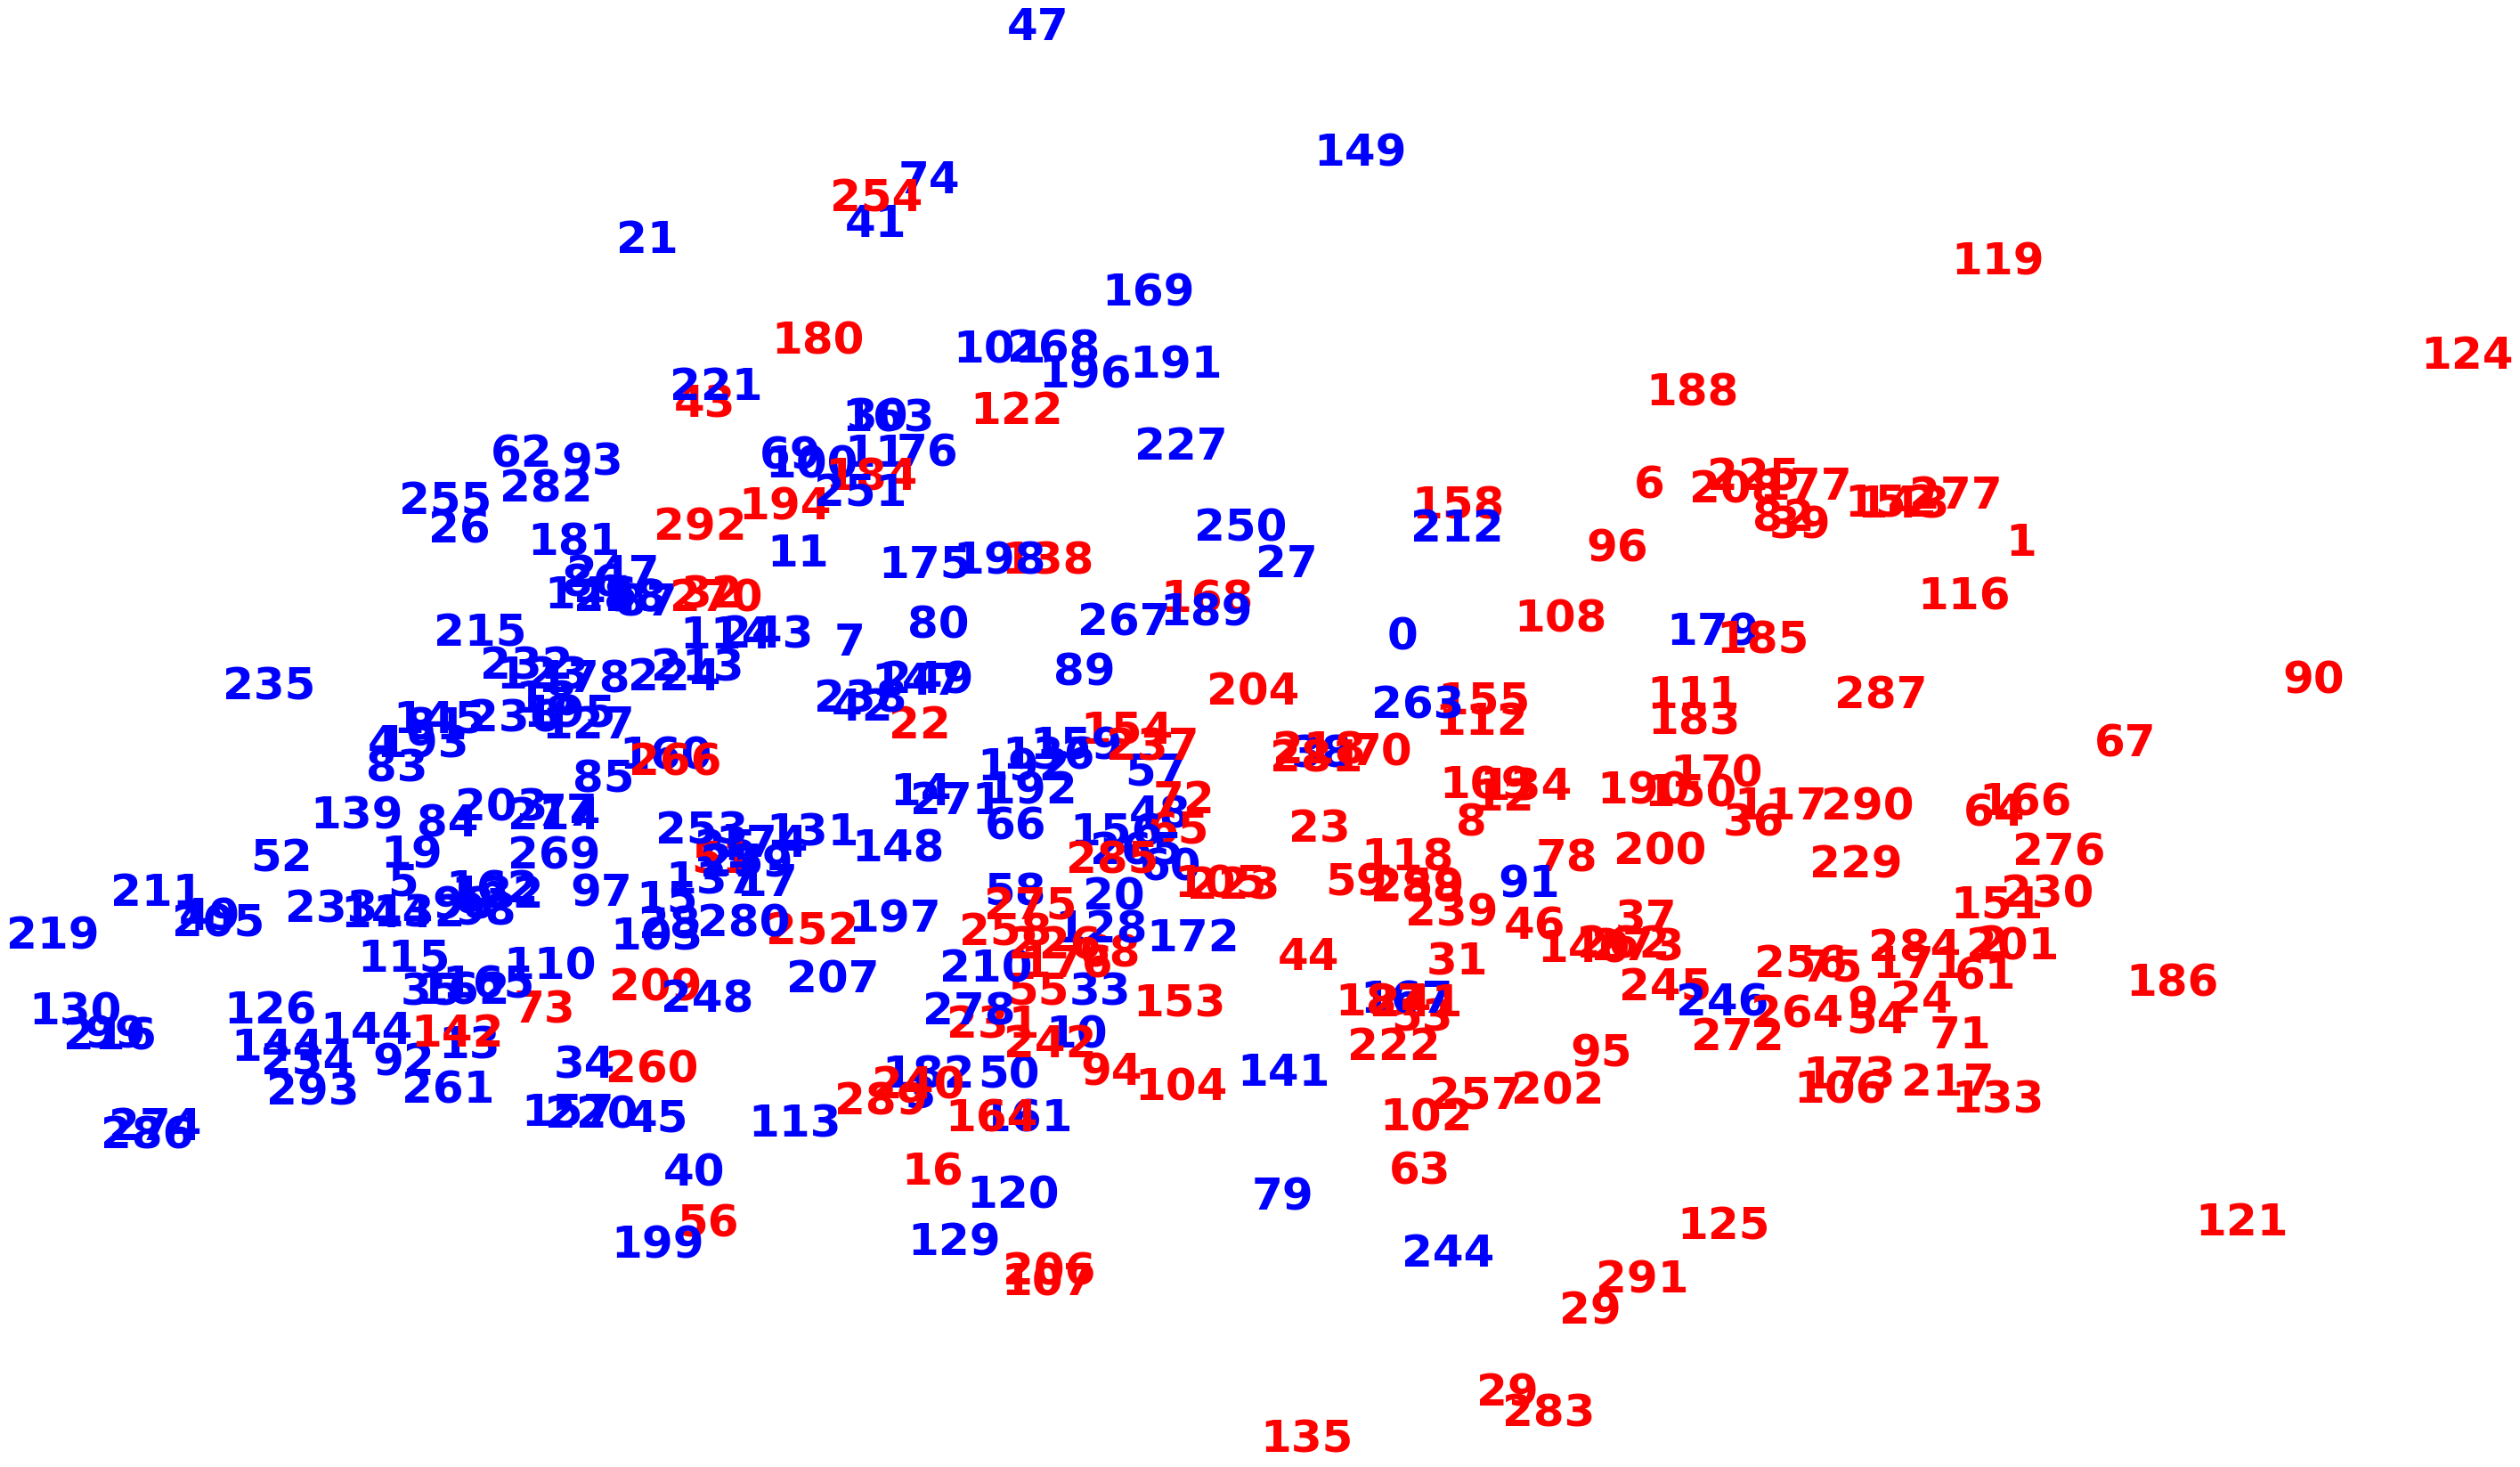

DBSCAN: eps 1 and min_samples 2


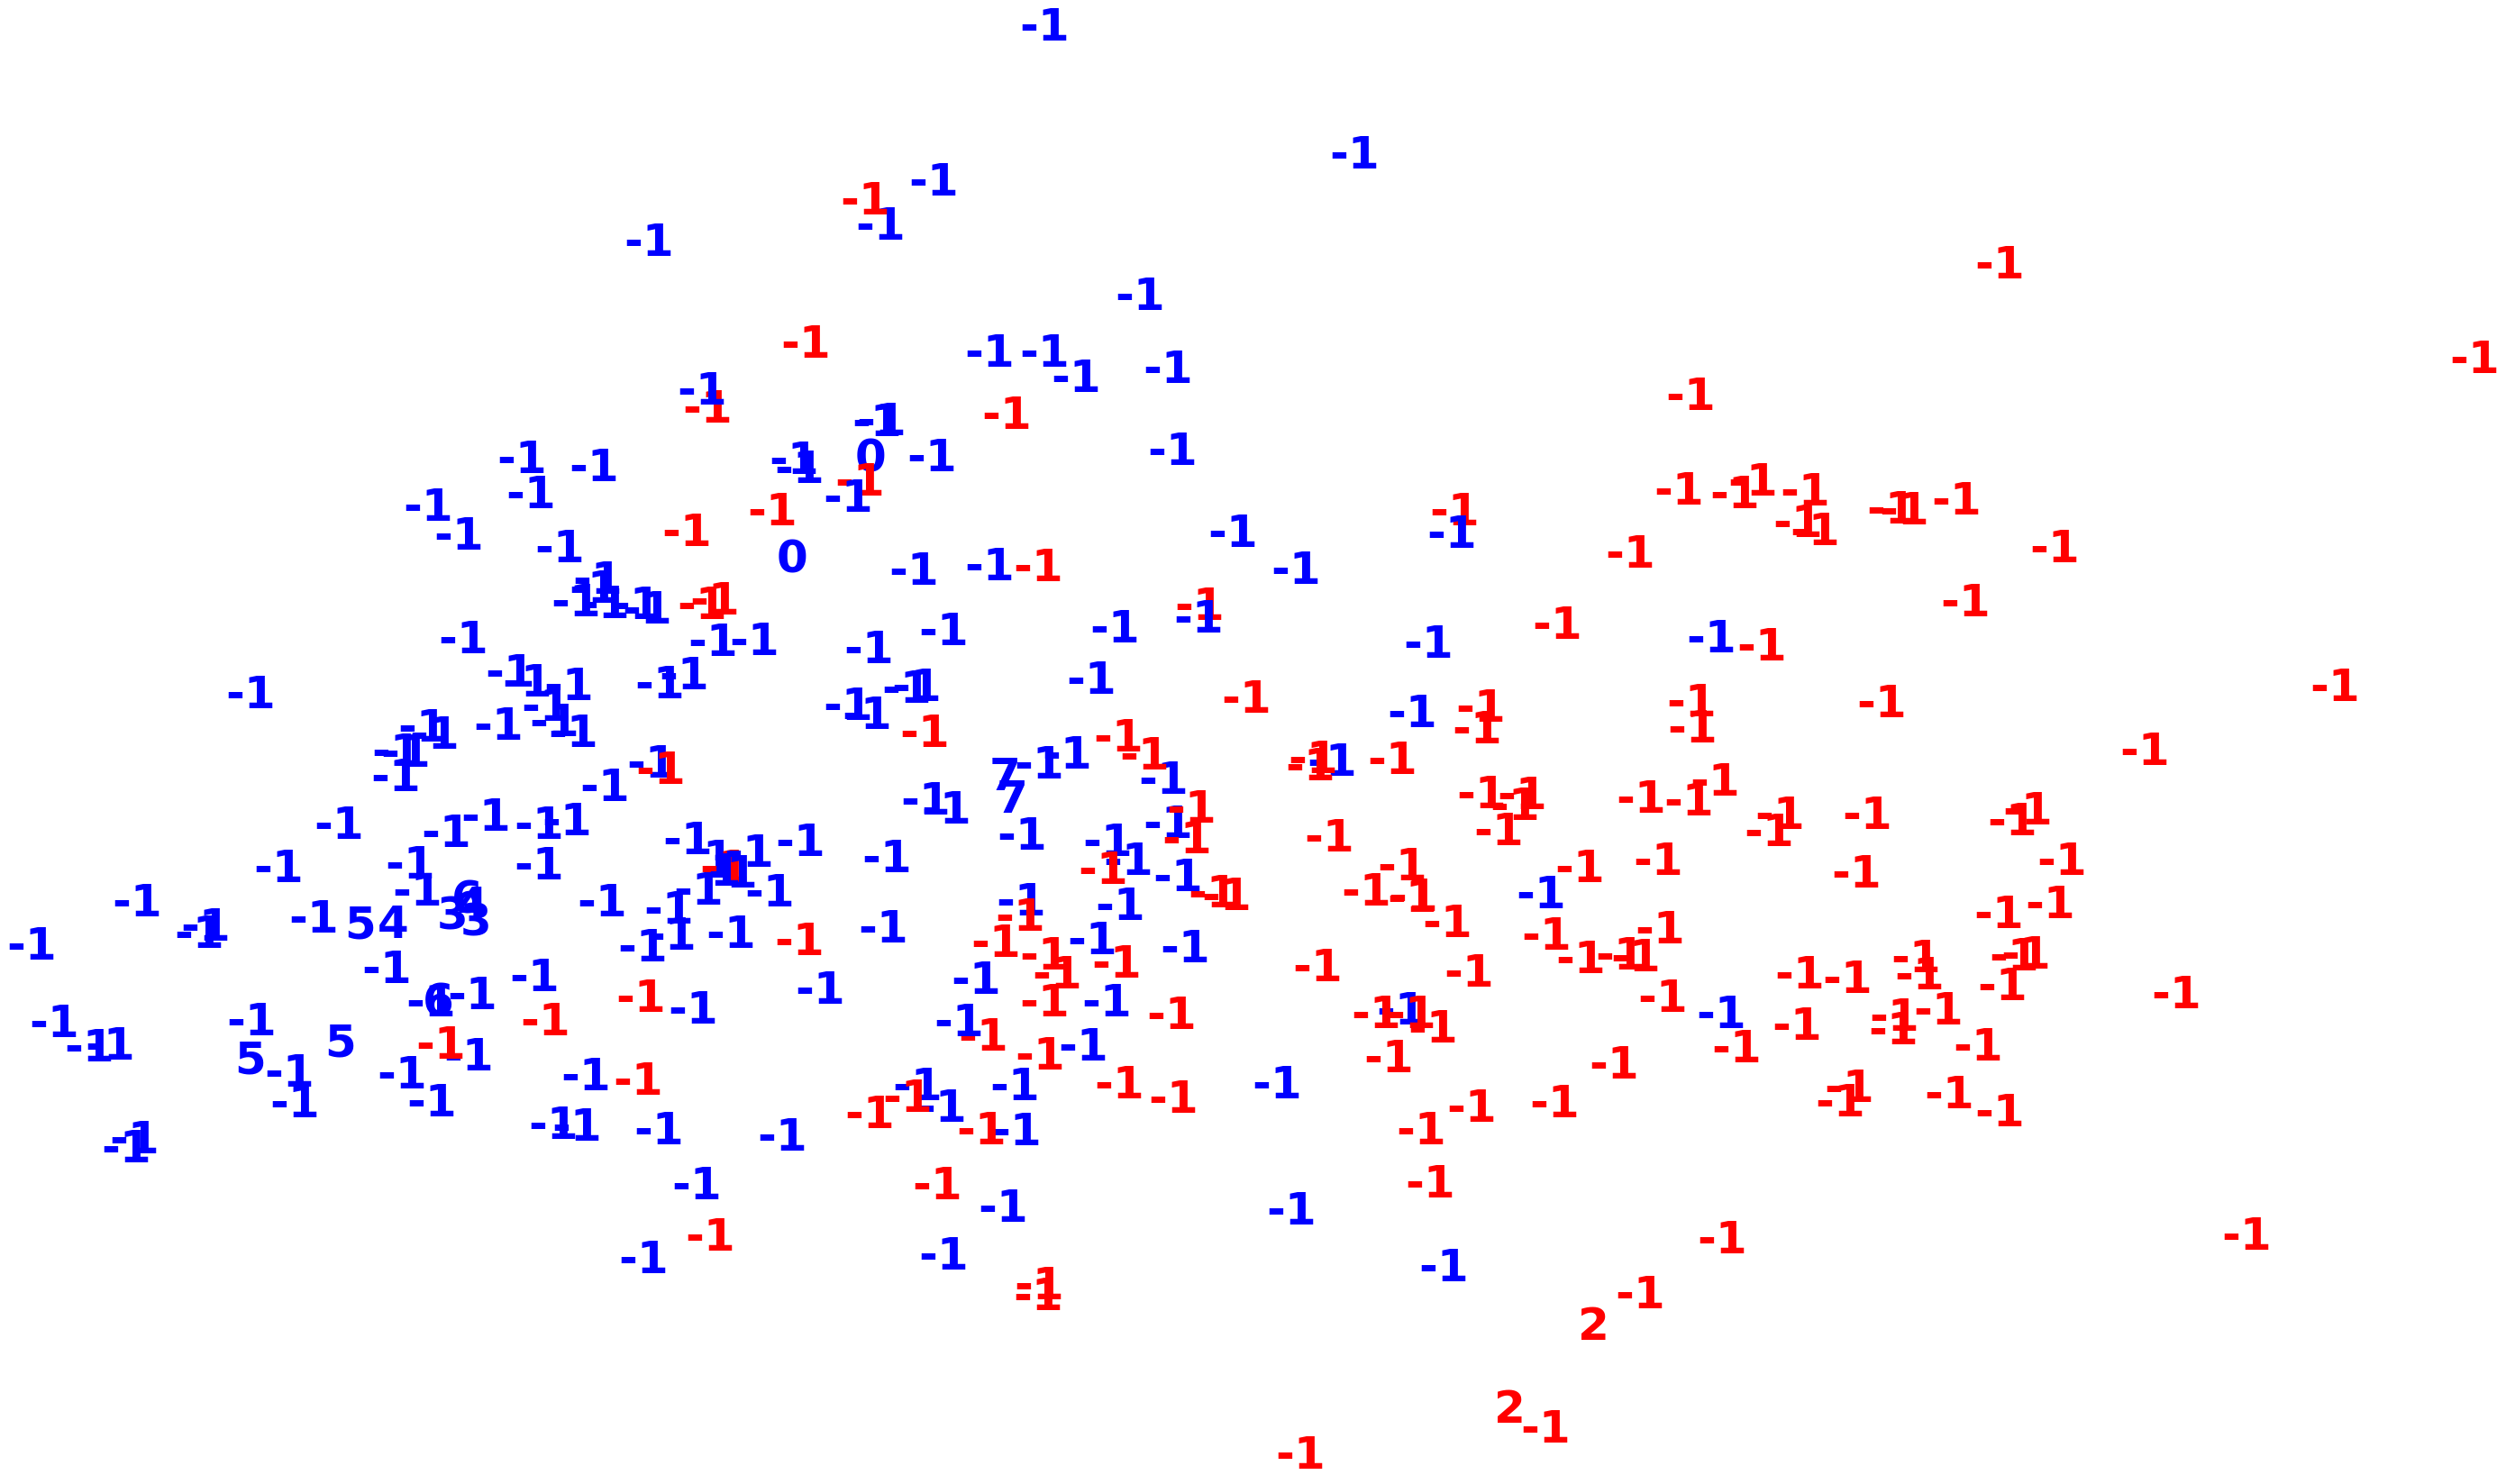

DBSCAN: eps 1 and min_samples 3


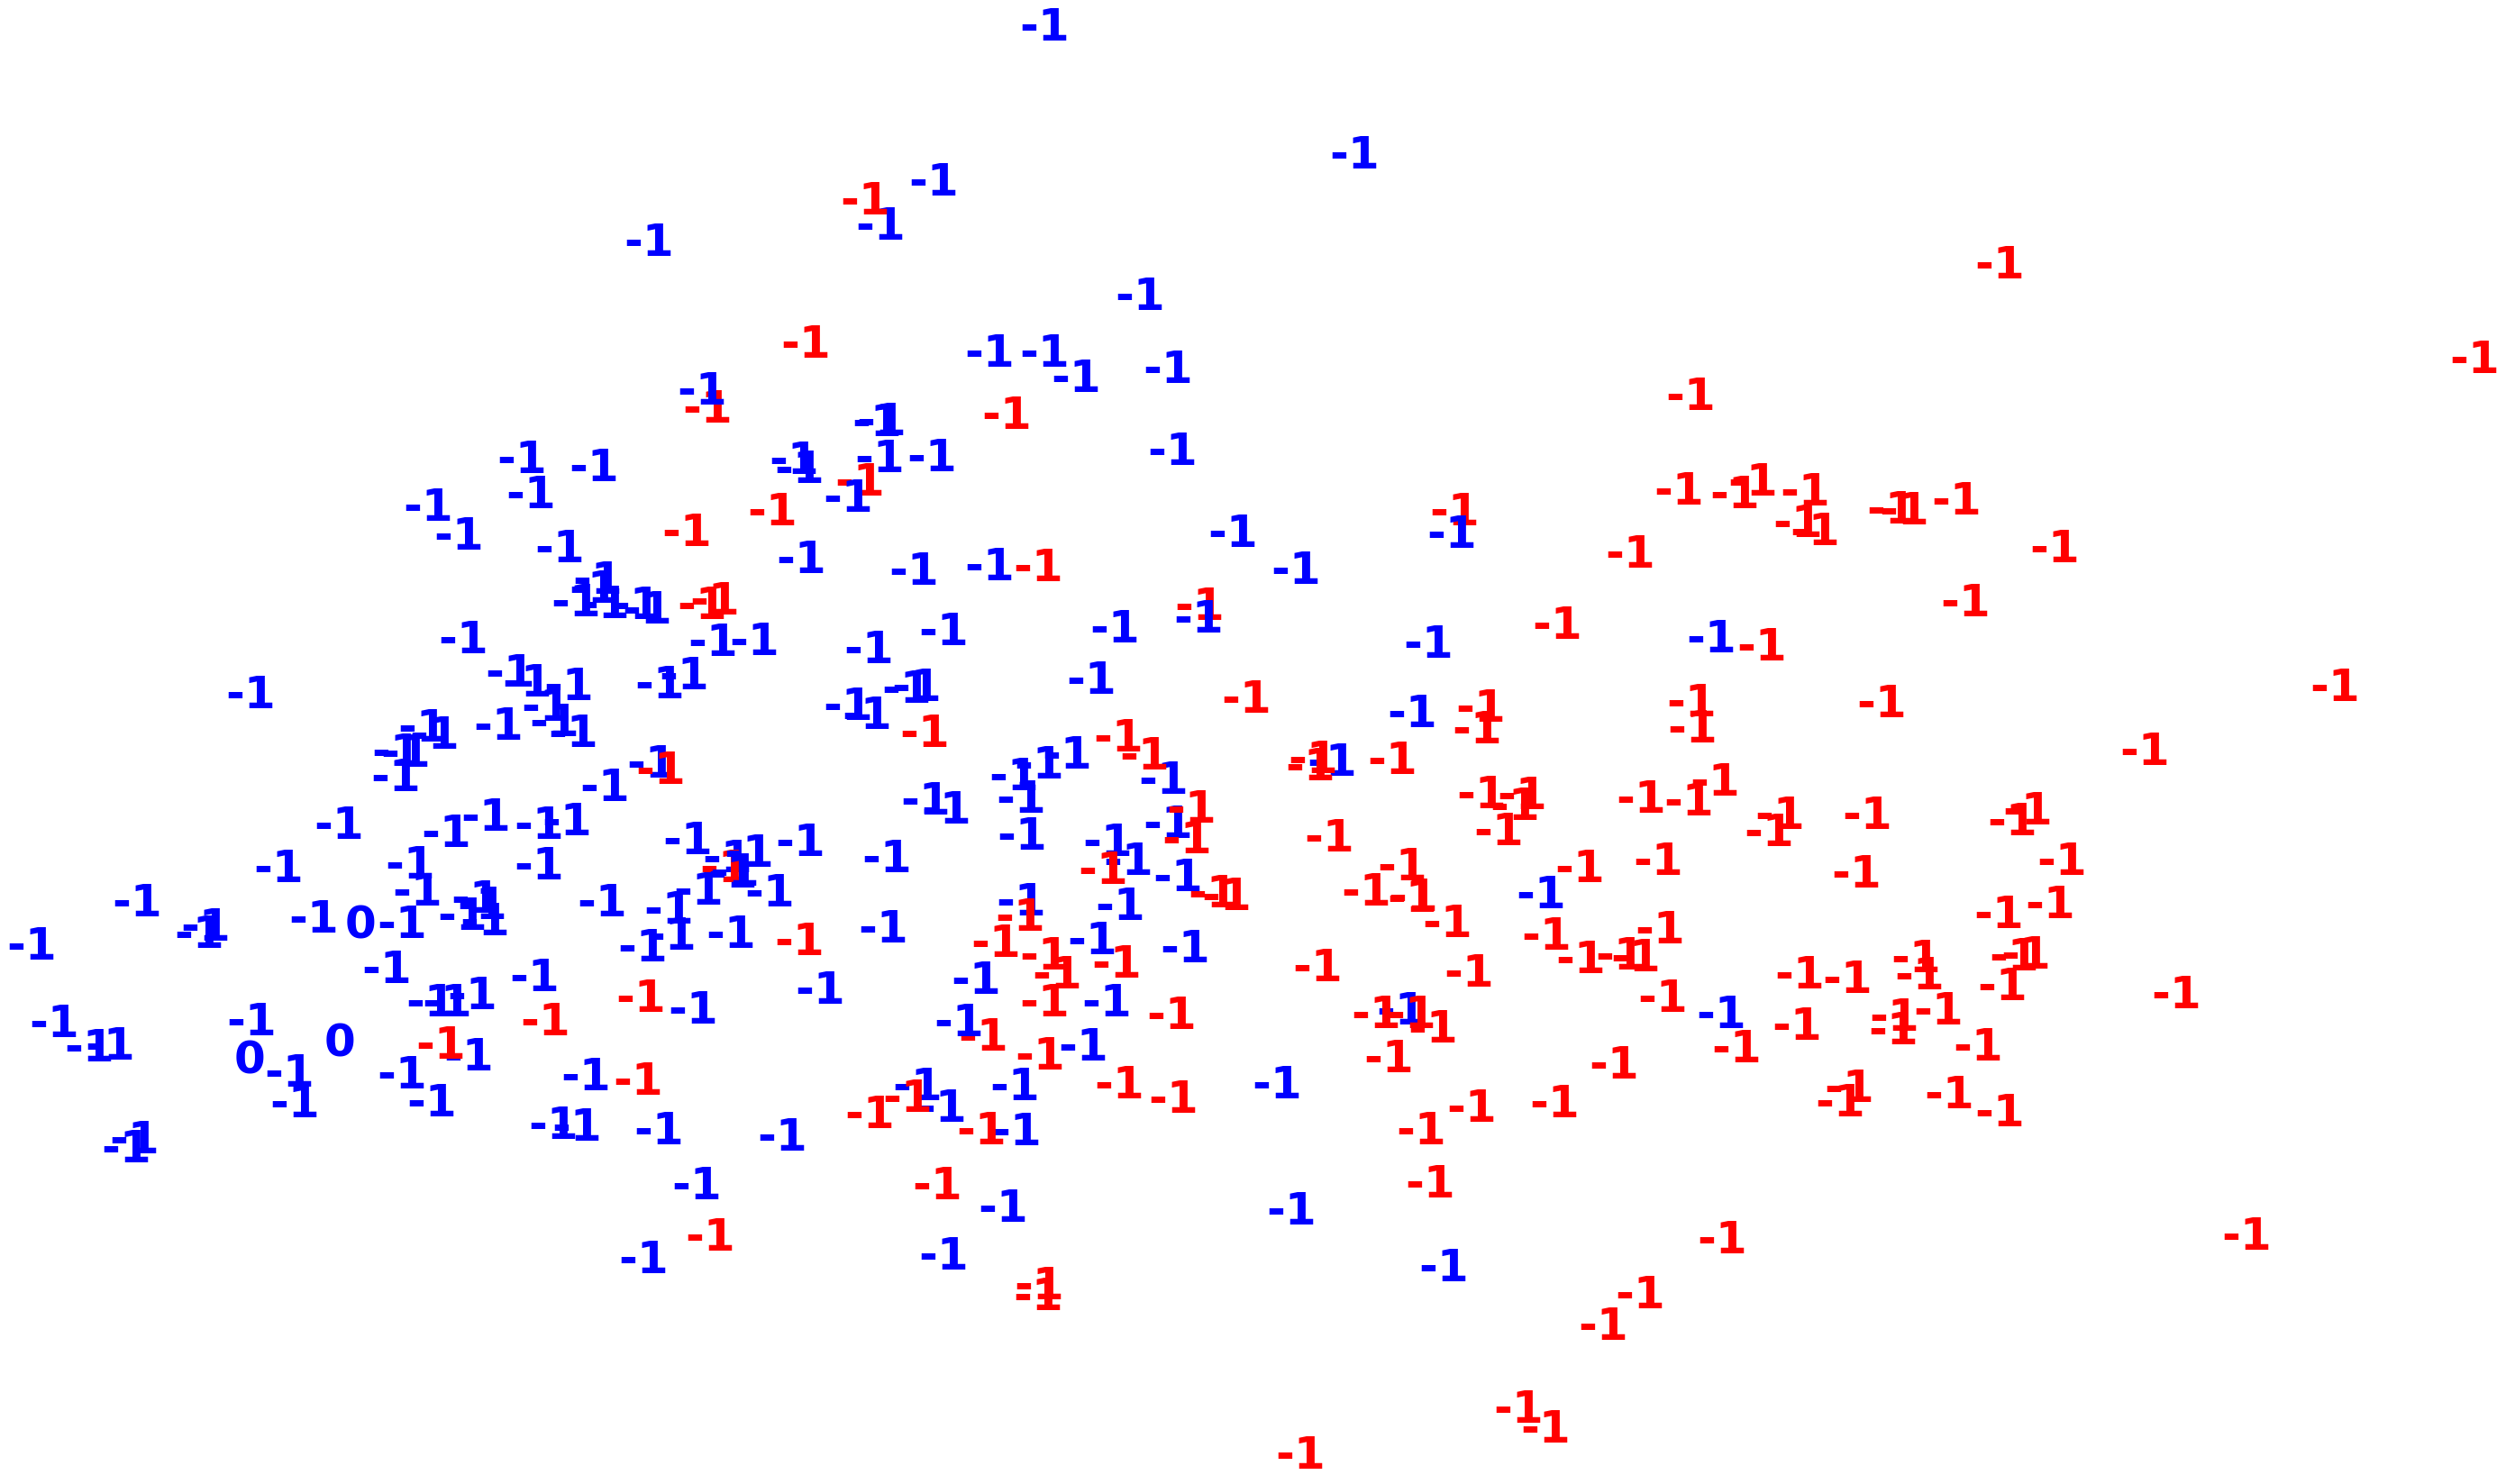

DBSCAN: eps 1 and min_samples 4


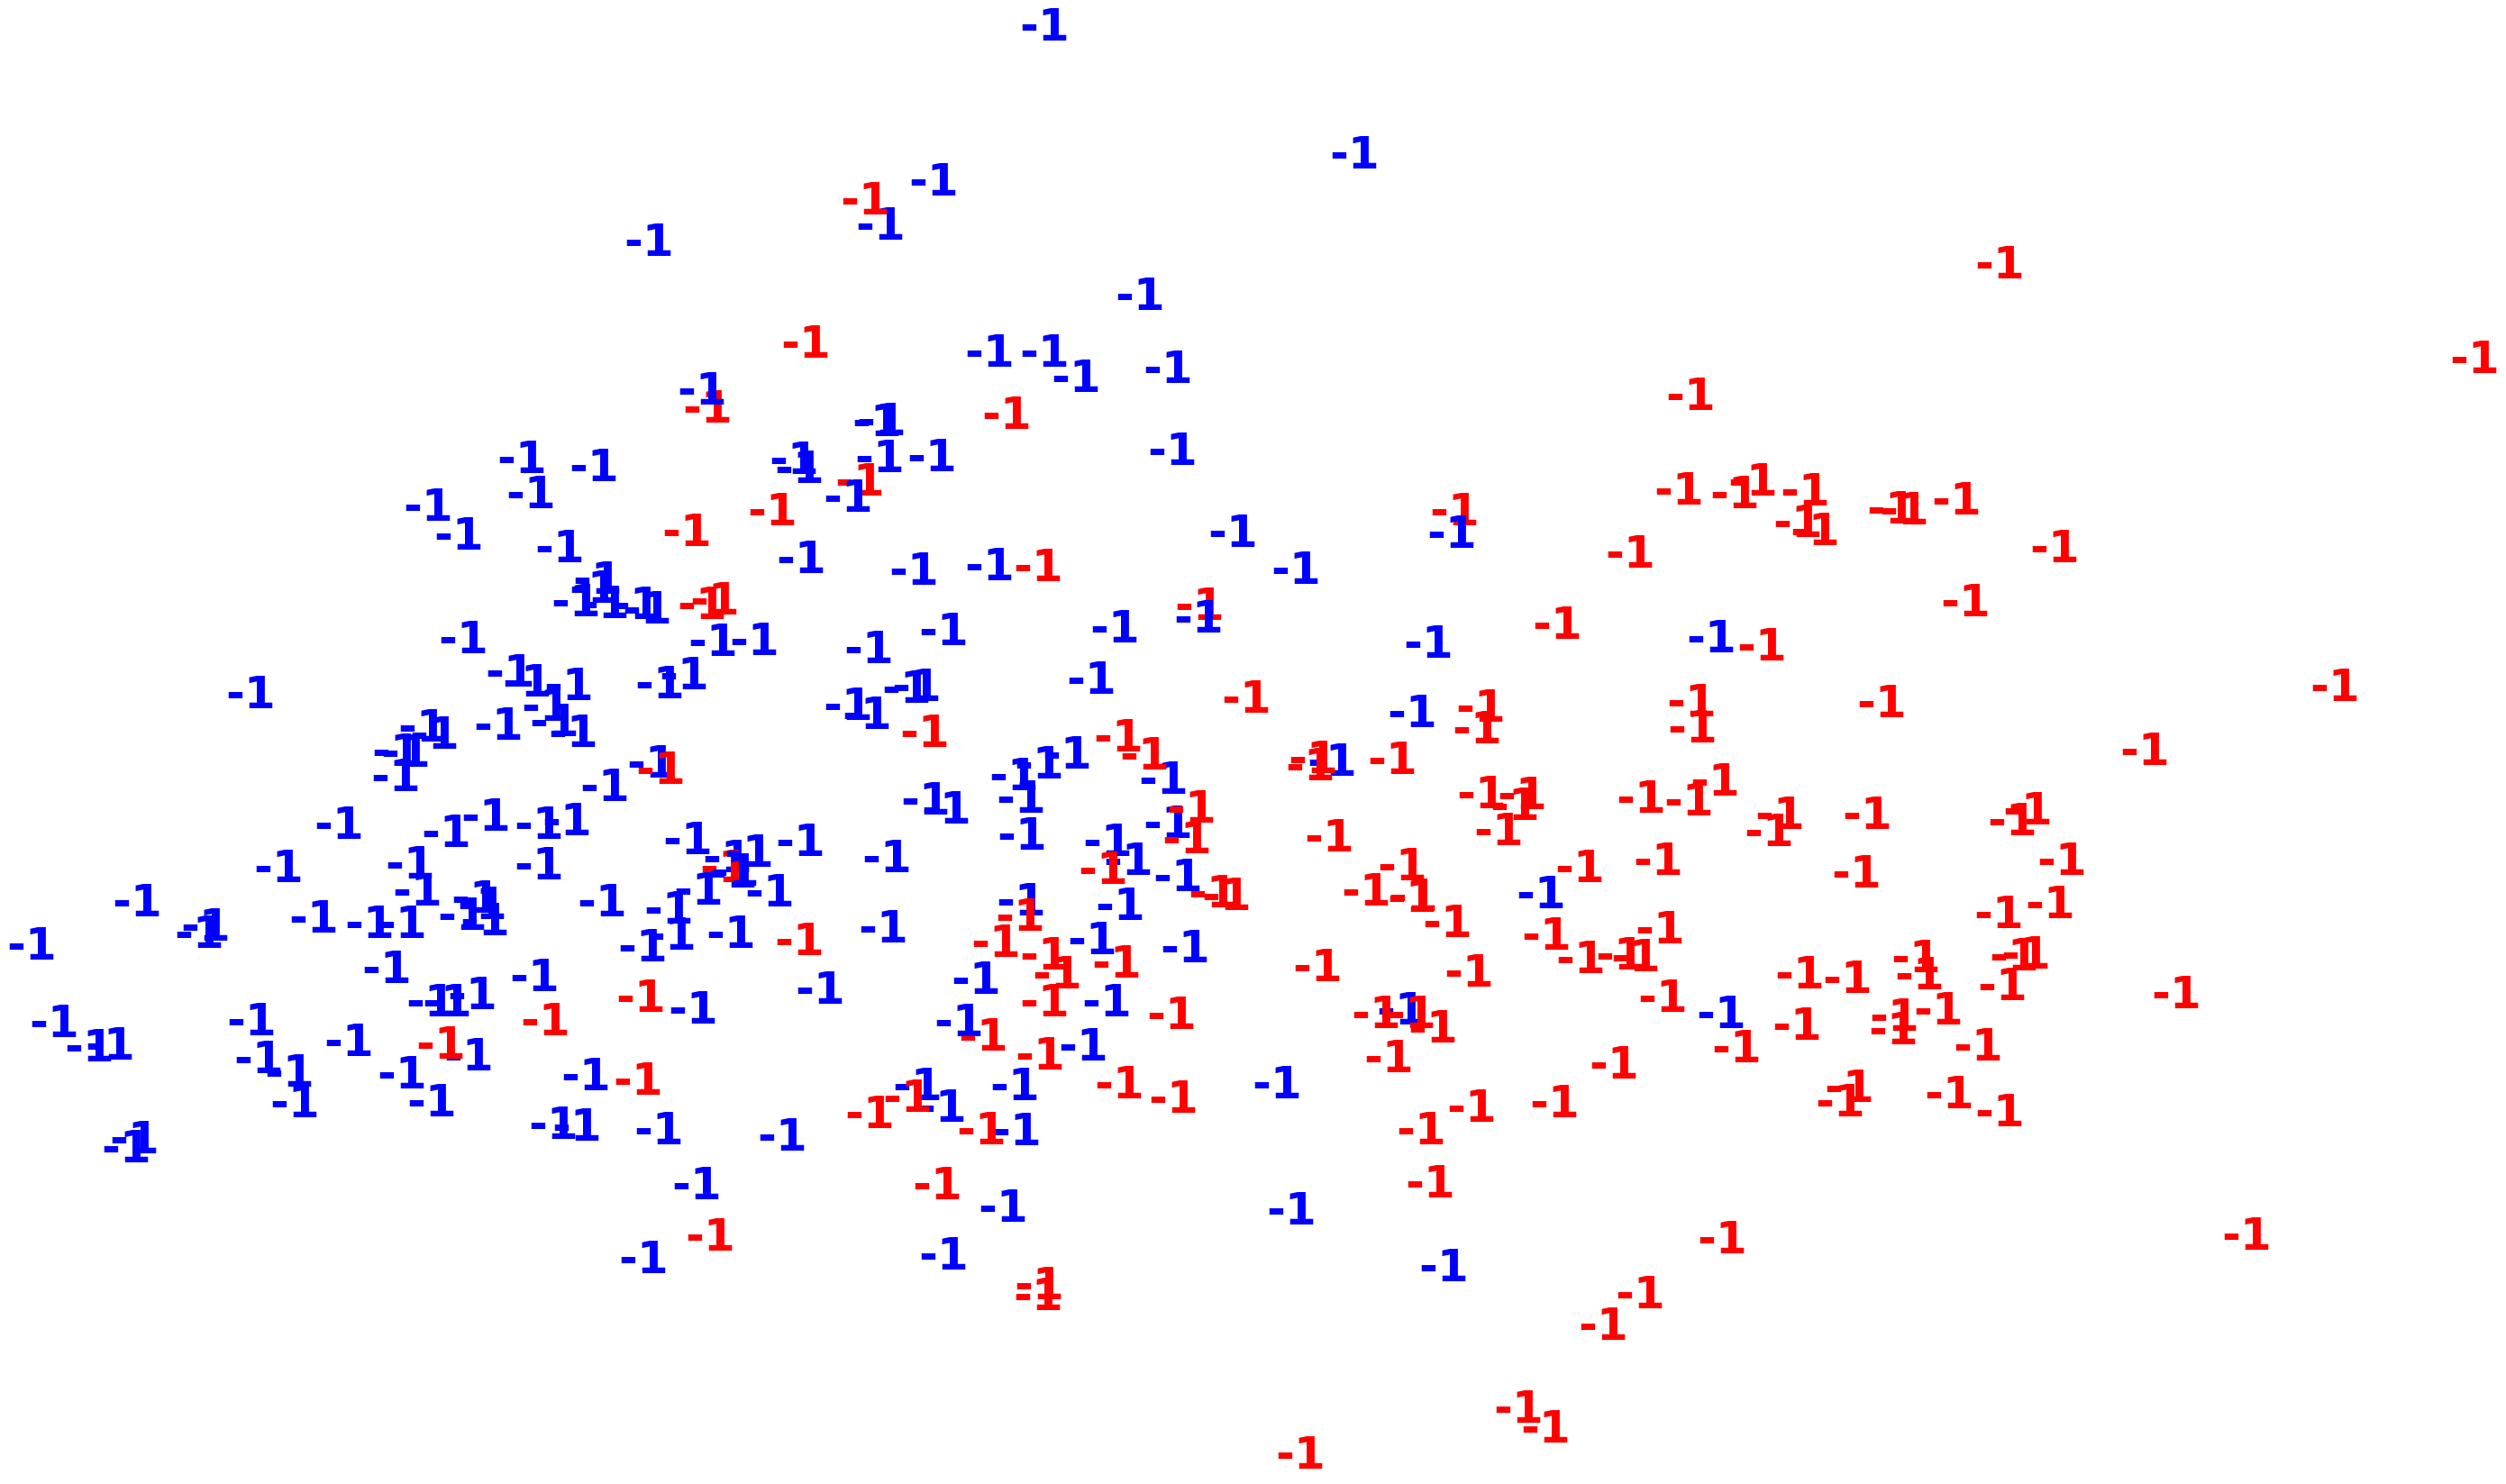

DBSCAN: eps 1 and min_samples 5


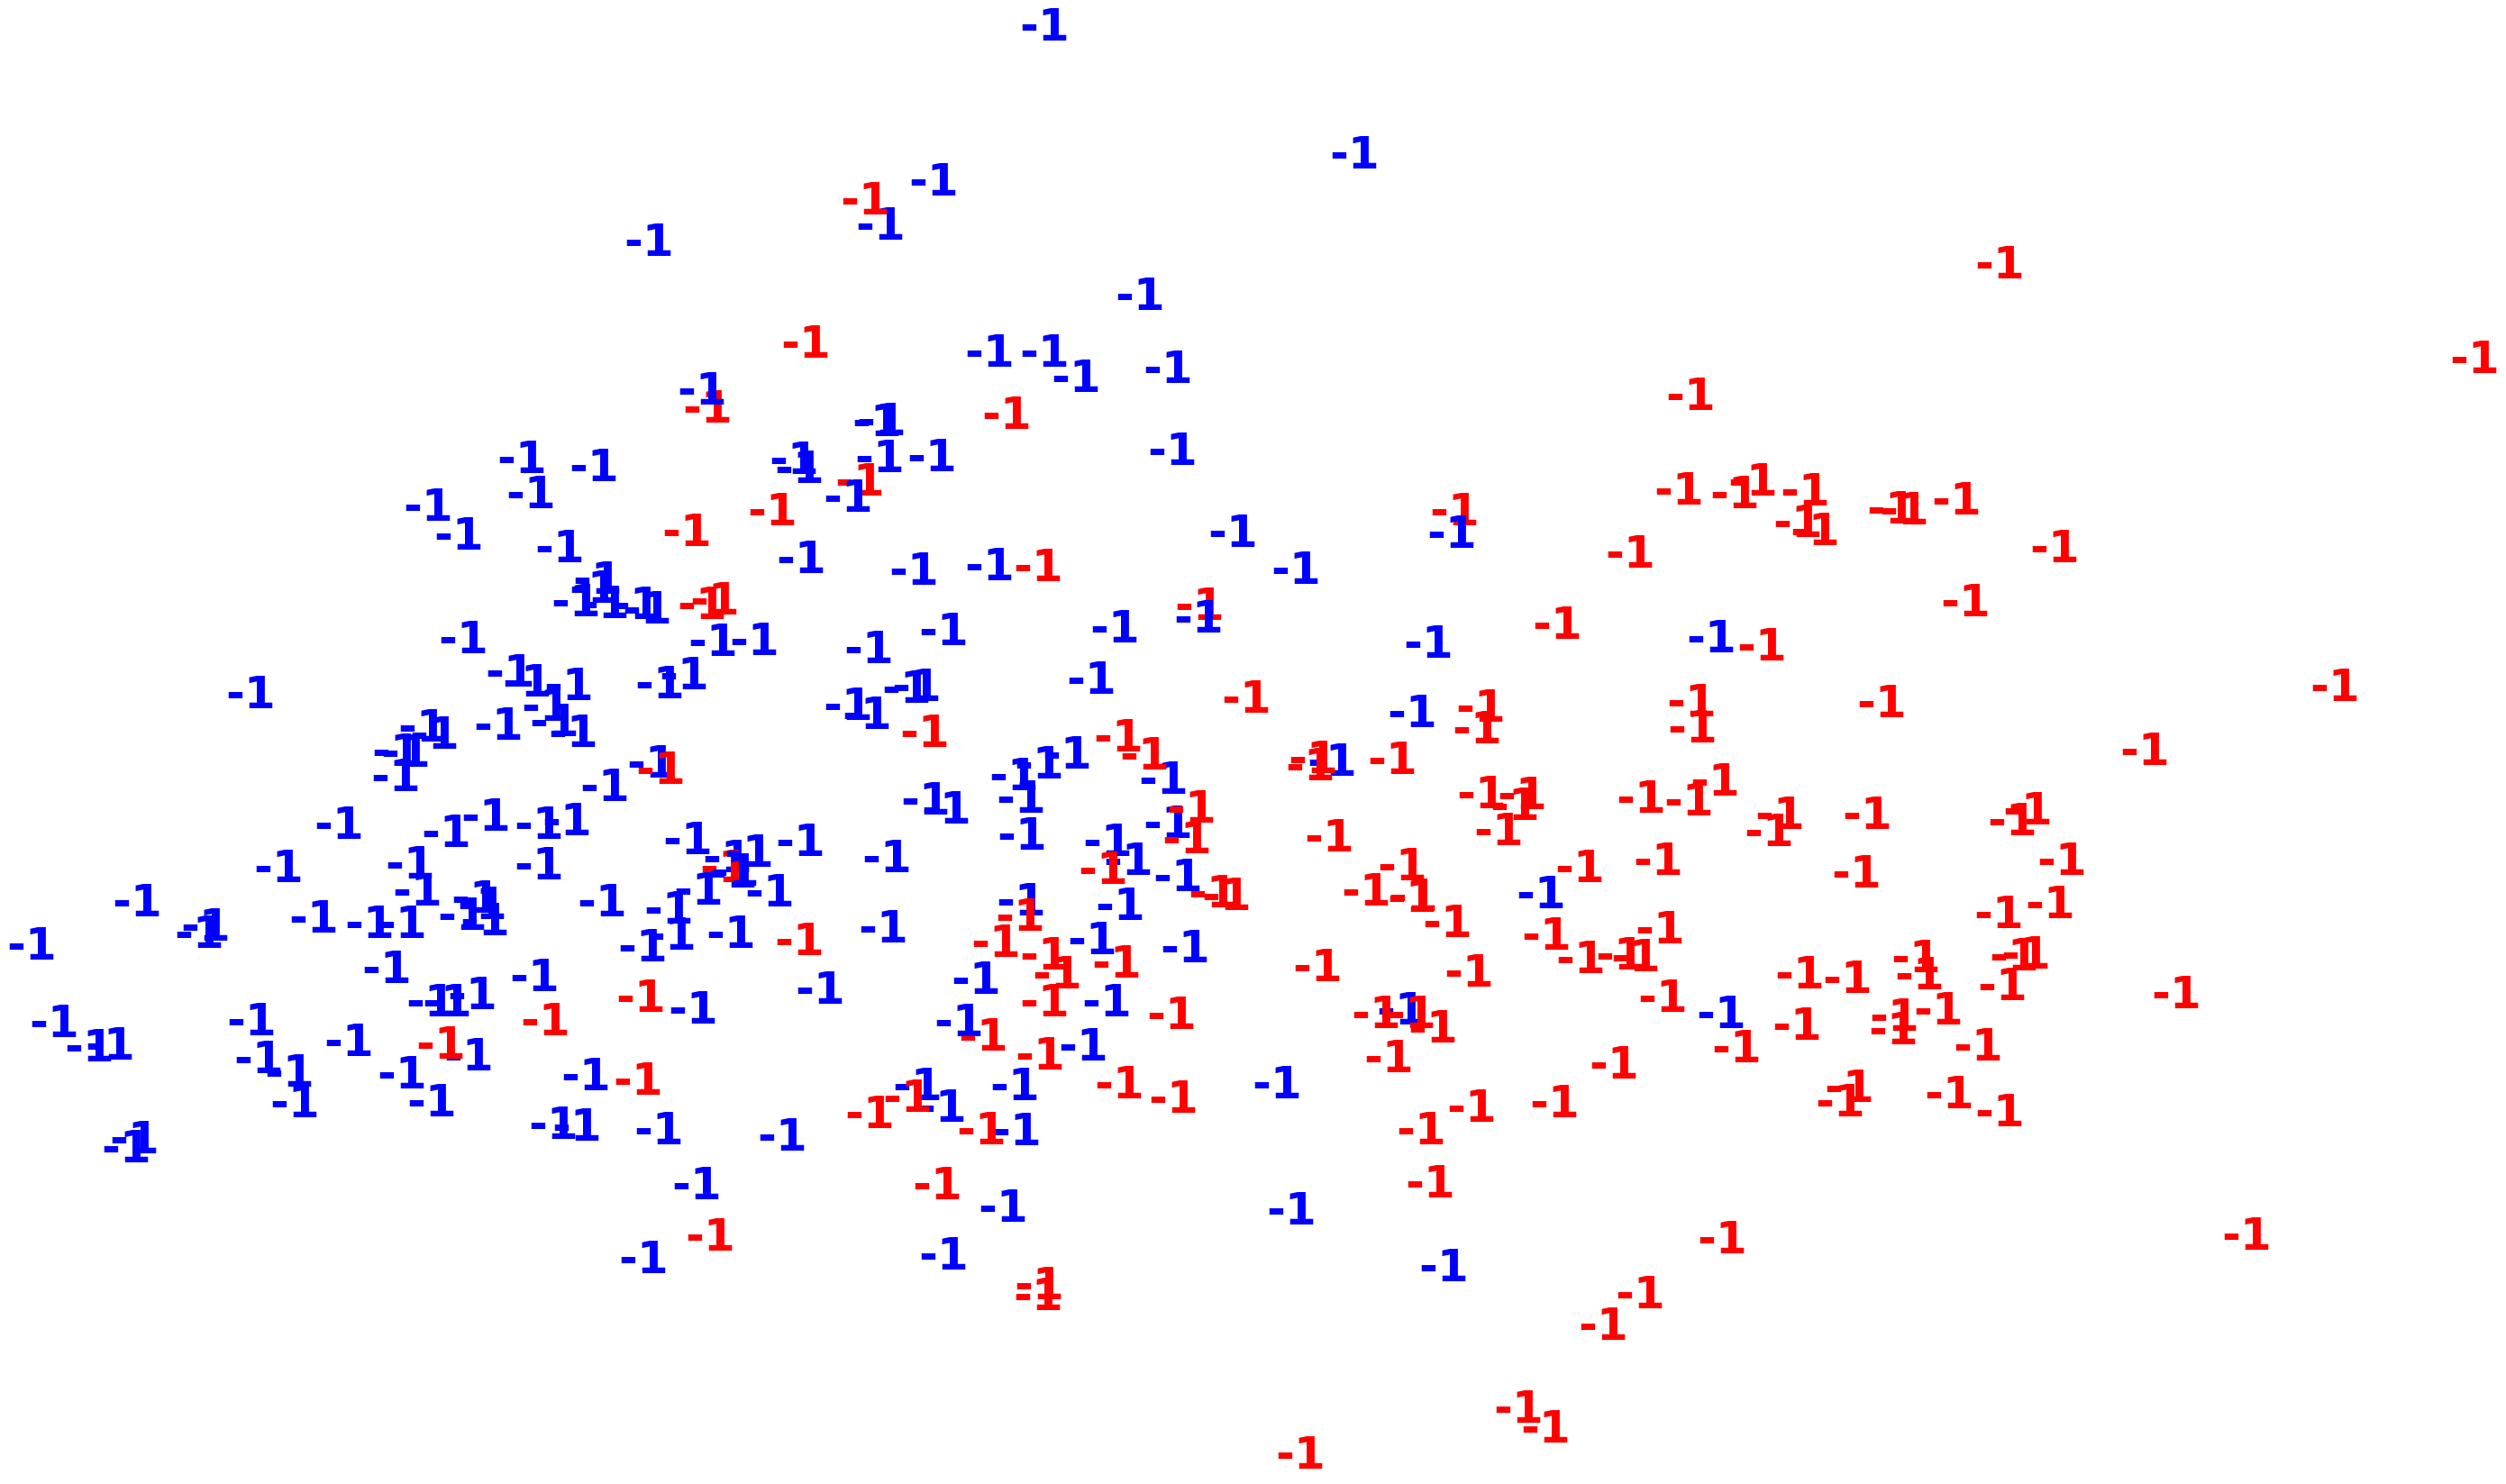

DBSCAN: eps 1 and min_samples 6


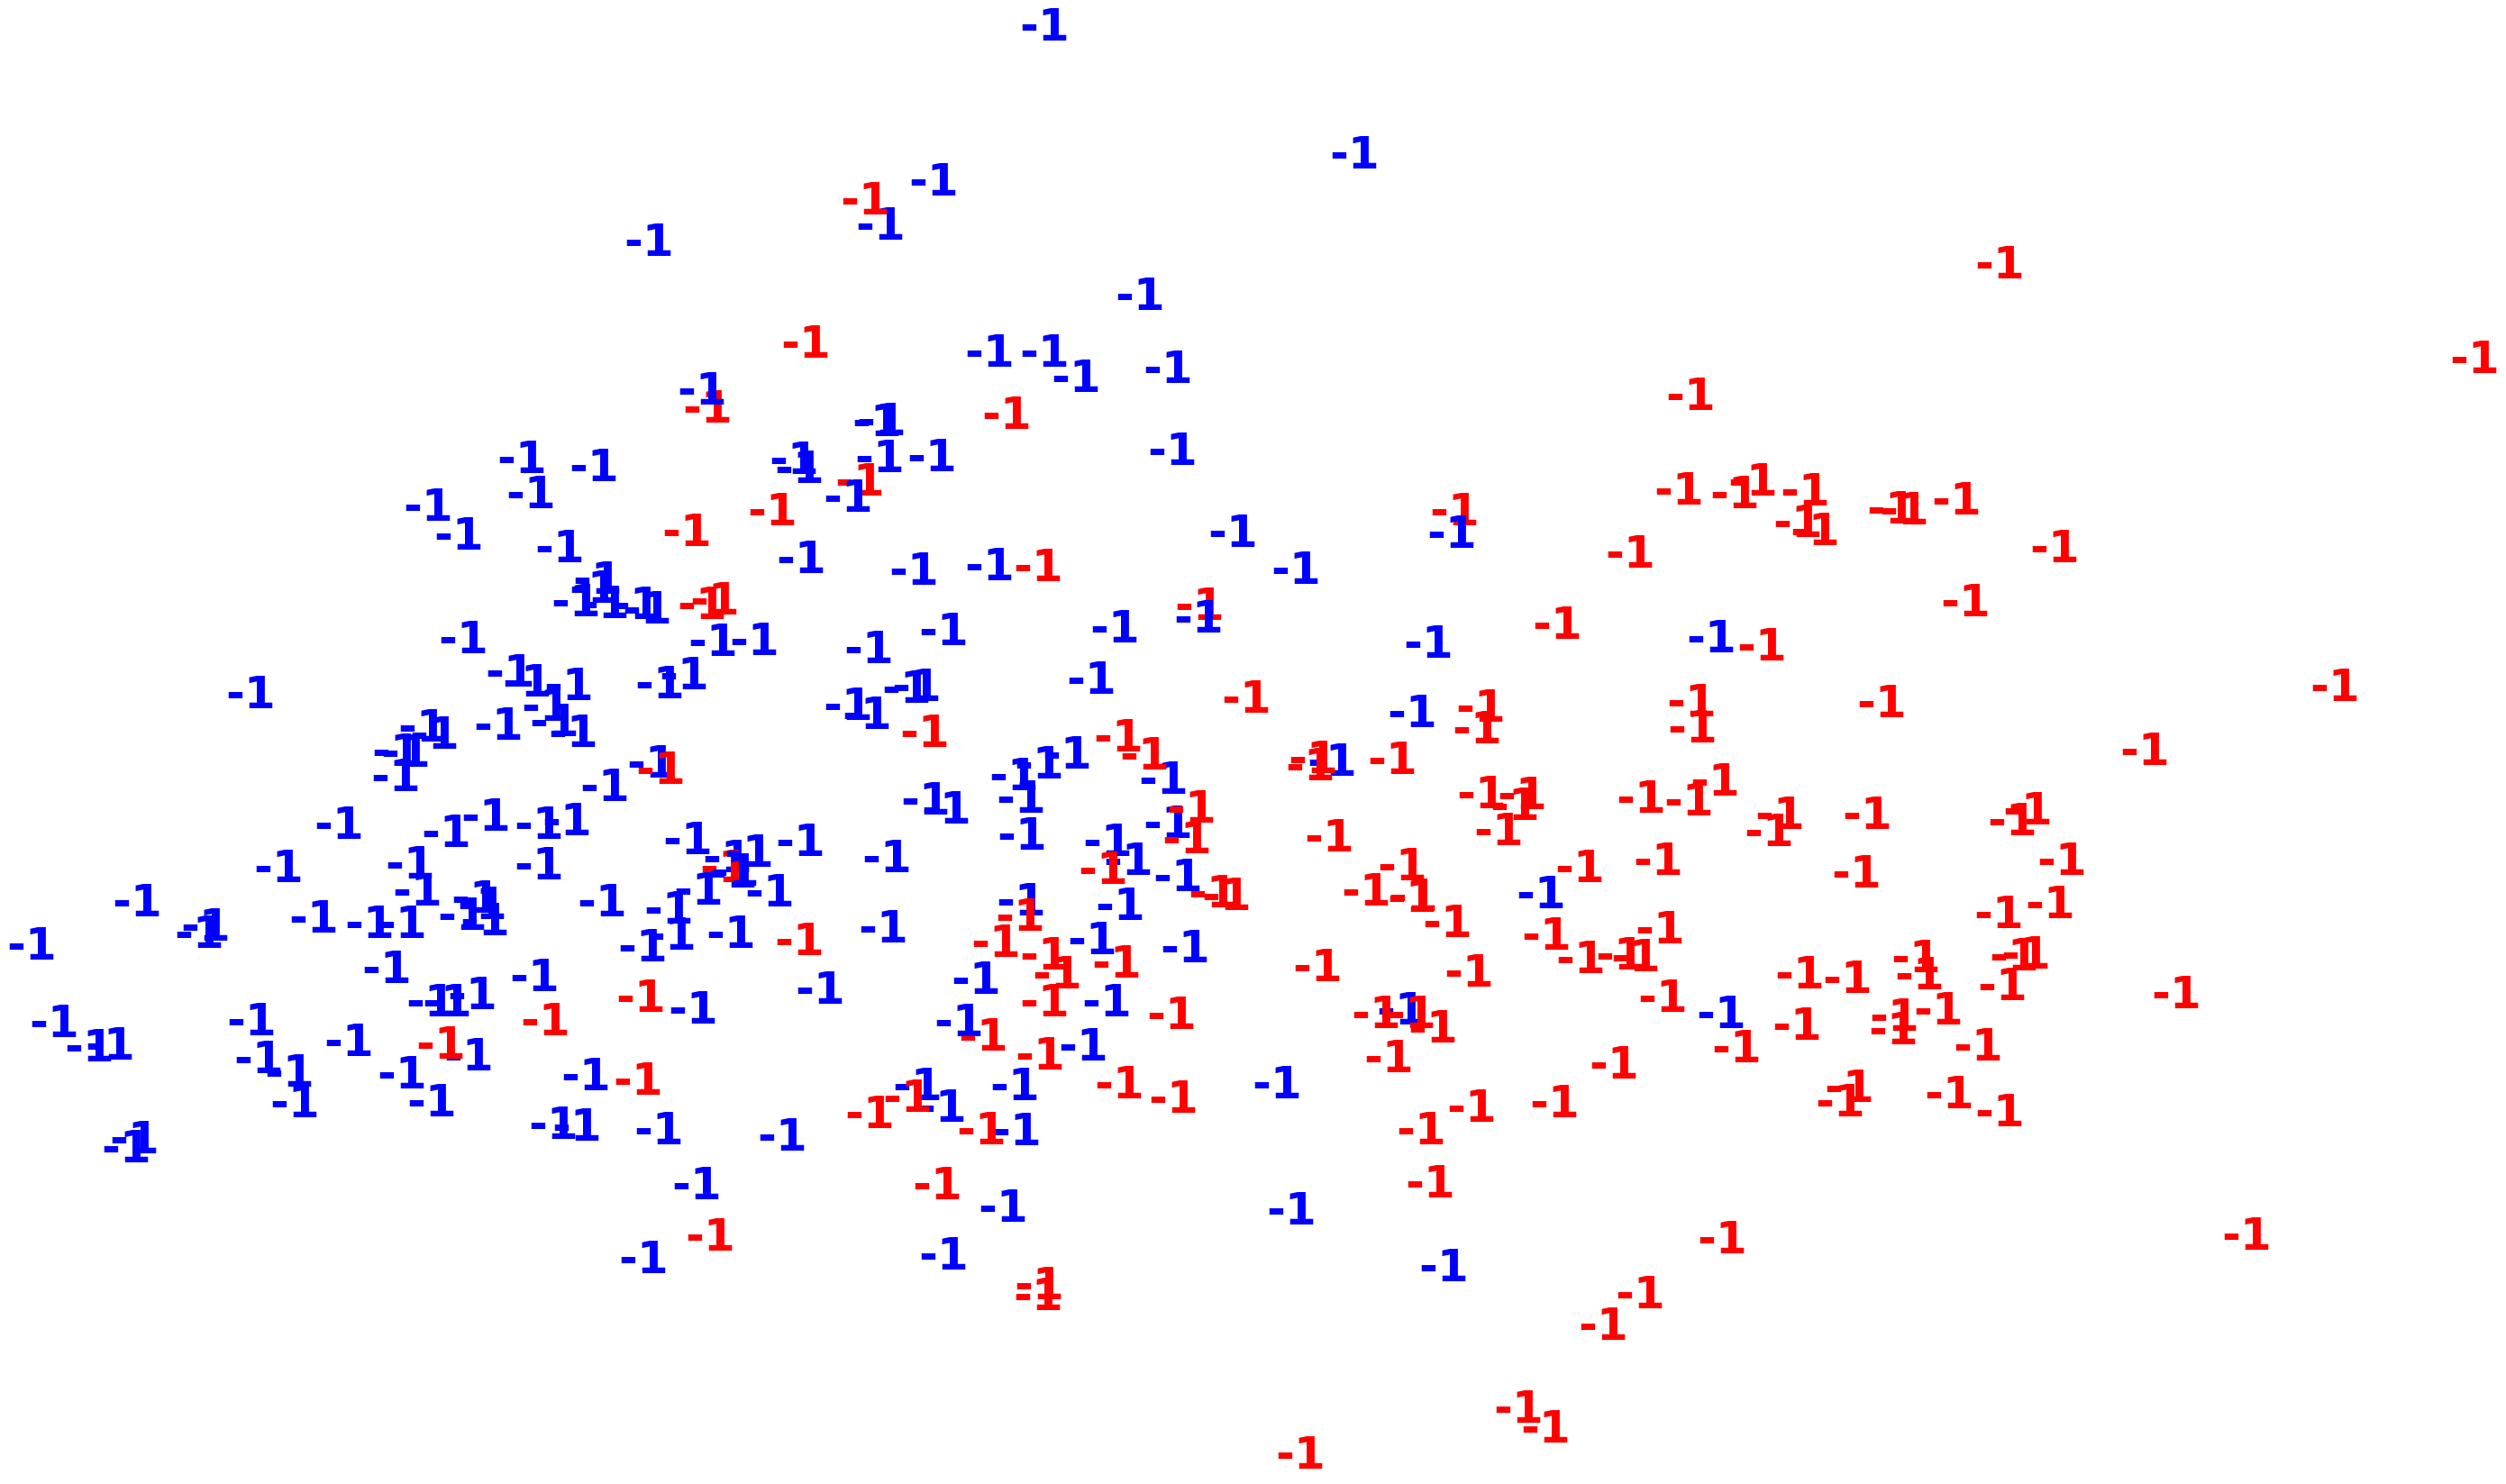

DBSCAN: eps 1 and min_samples 7


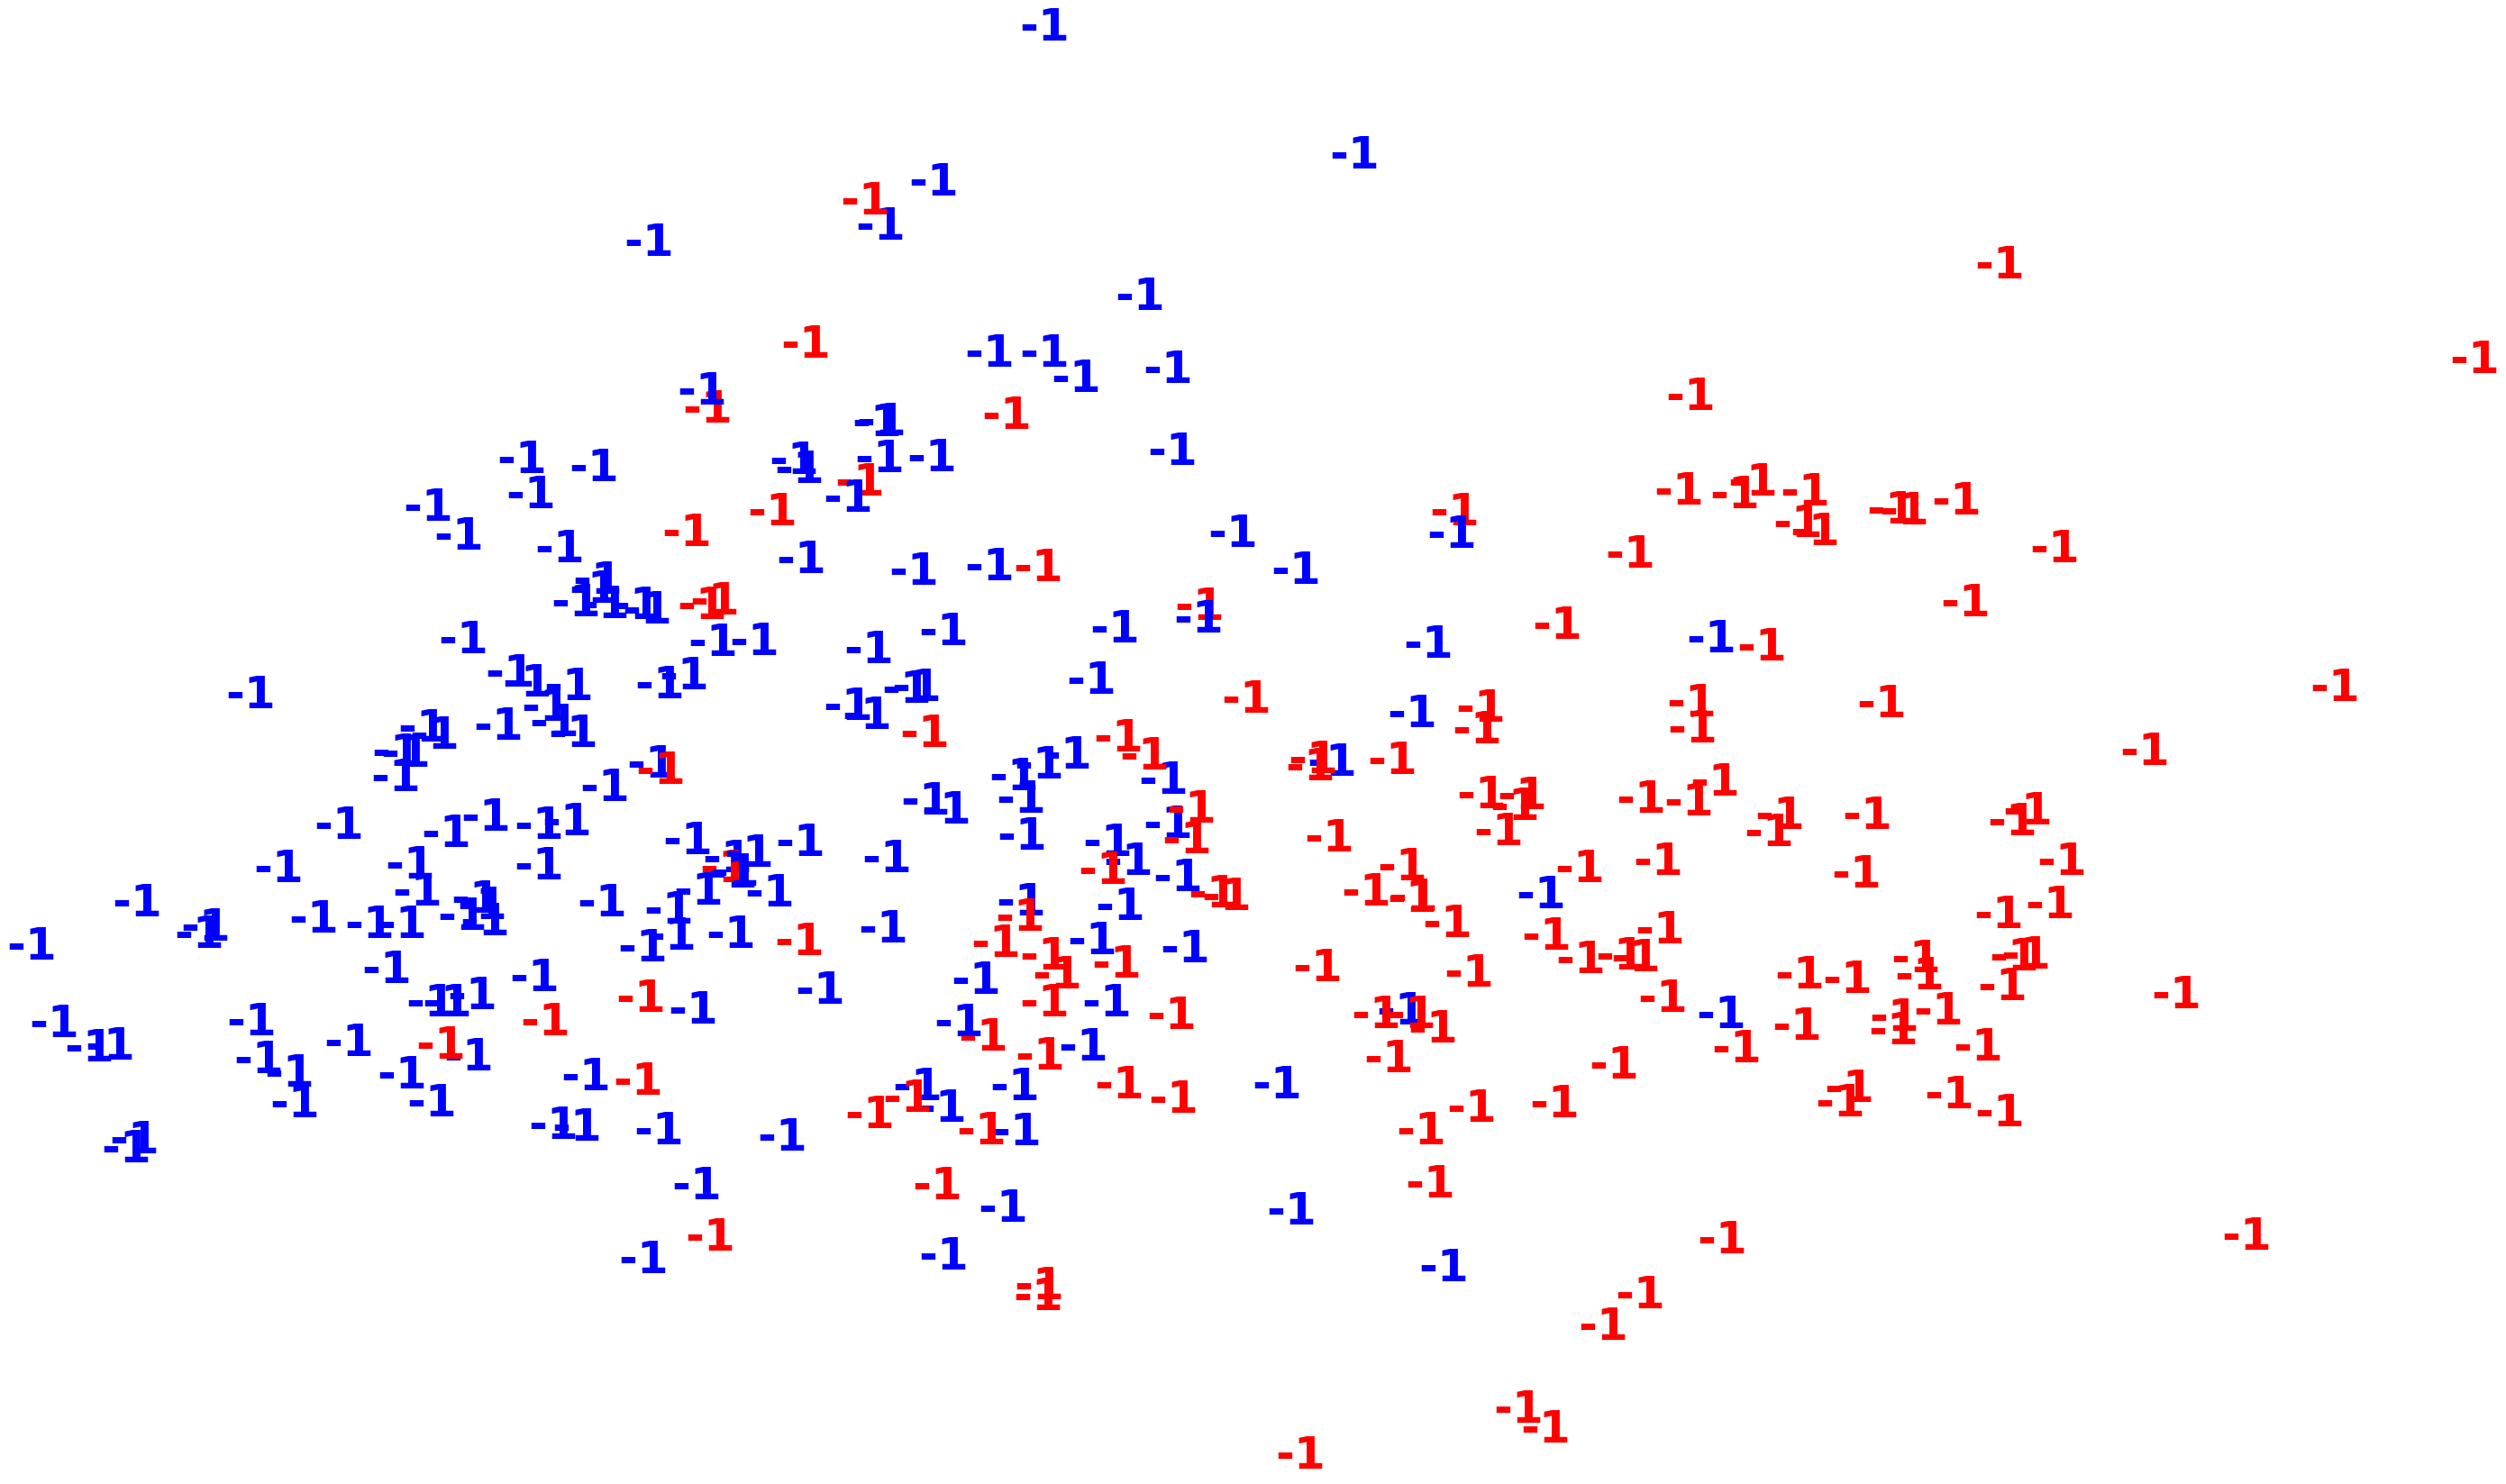

In [9]:
min_samples = [1, 2, 3, 4, 5, 6, 7]

for min_sample in min_samples:

    # Define cluster
    dbscan_cluster = DBSCAN(eps=1, min_samples=min_sample, metric='euclidean')

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    
    print('DBSCAN: eps {} and min_samples {}'.format(str(1), min_sample))
    
    # Visual
    visual(X_std, clusters)

As ```eps``` remains constant at 1 and ```min_samples``` gradually increases, noise (values of -1) enters into the model.

### Increasing values for ```eps``` 

DBSCAN: eps 1 and min_samples 1


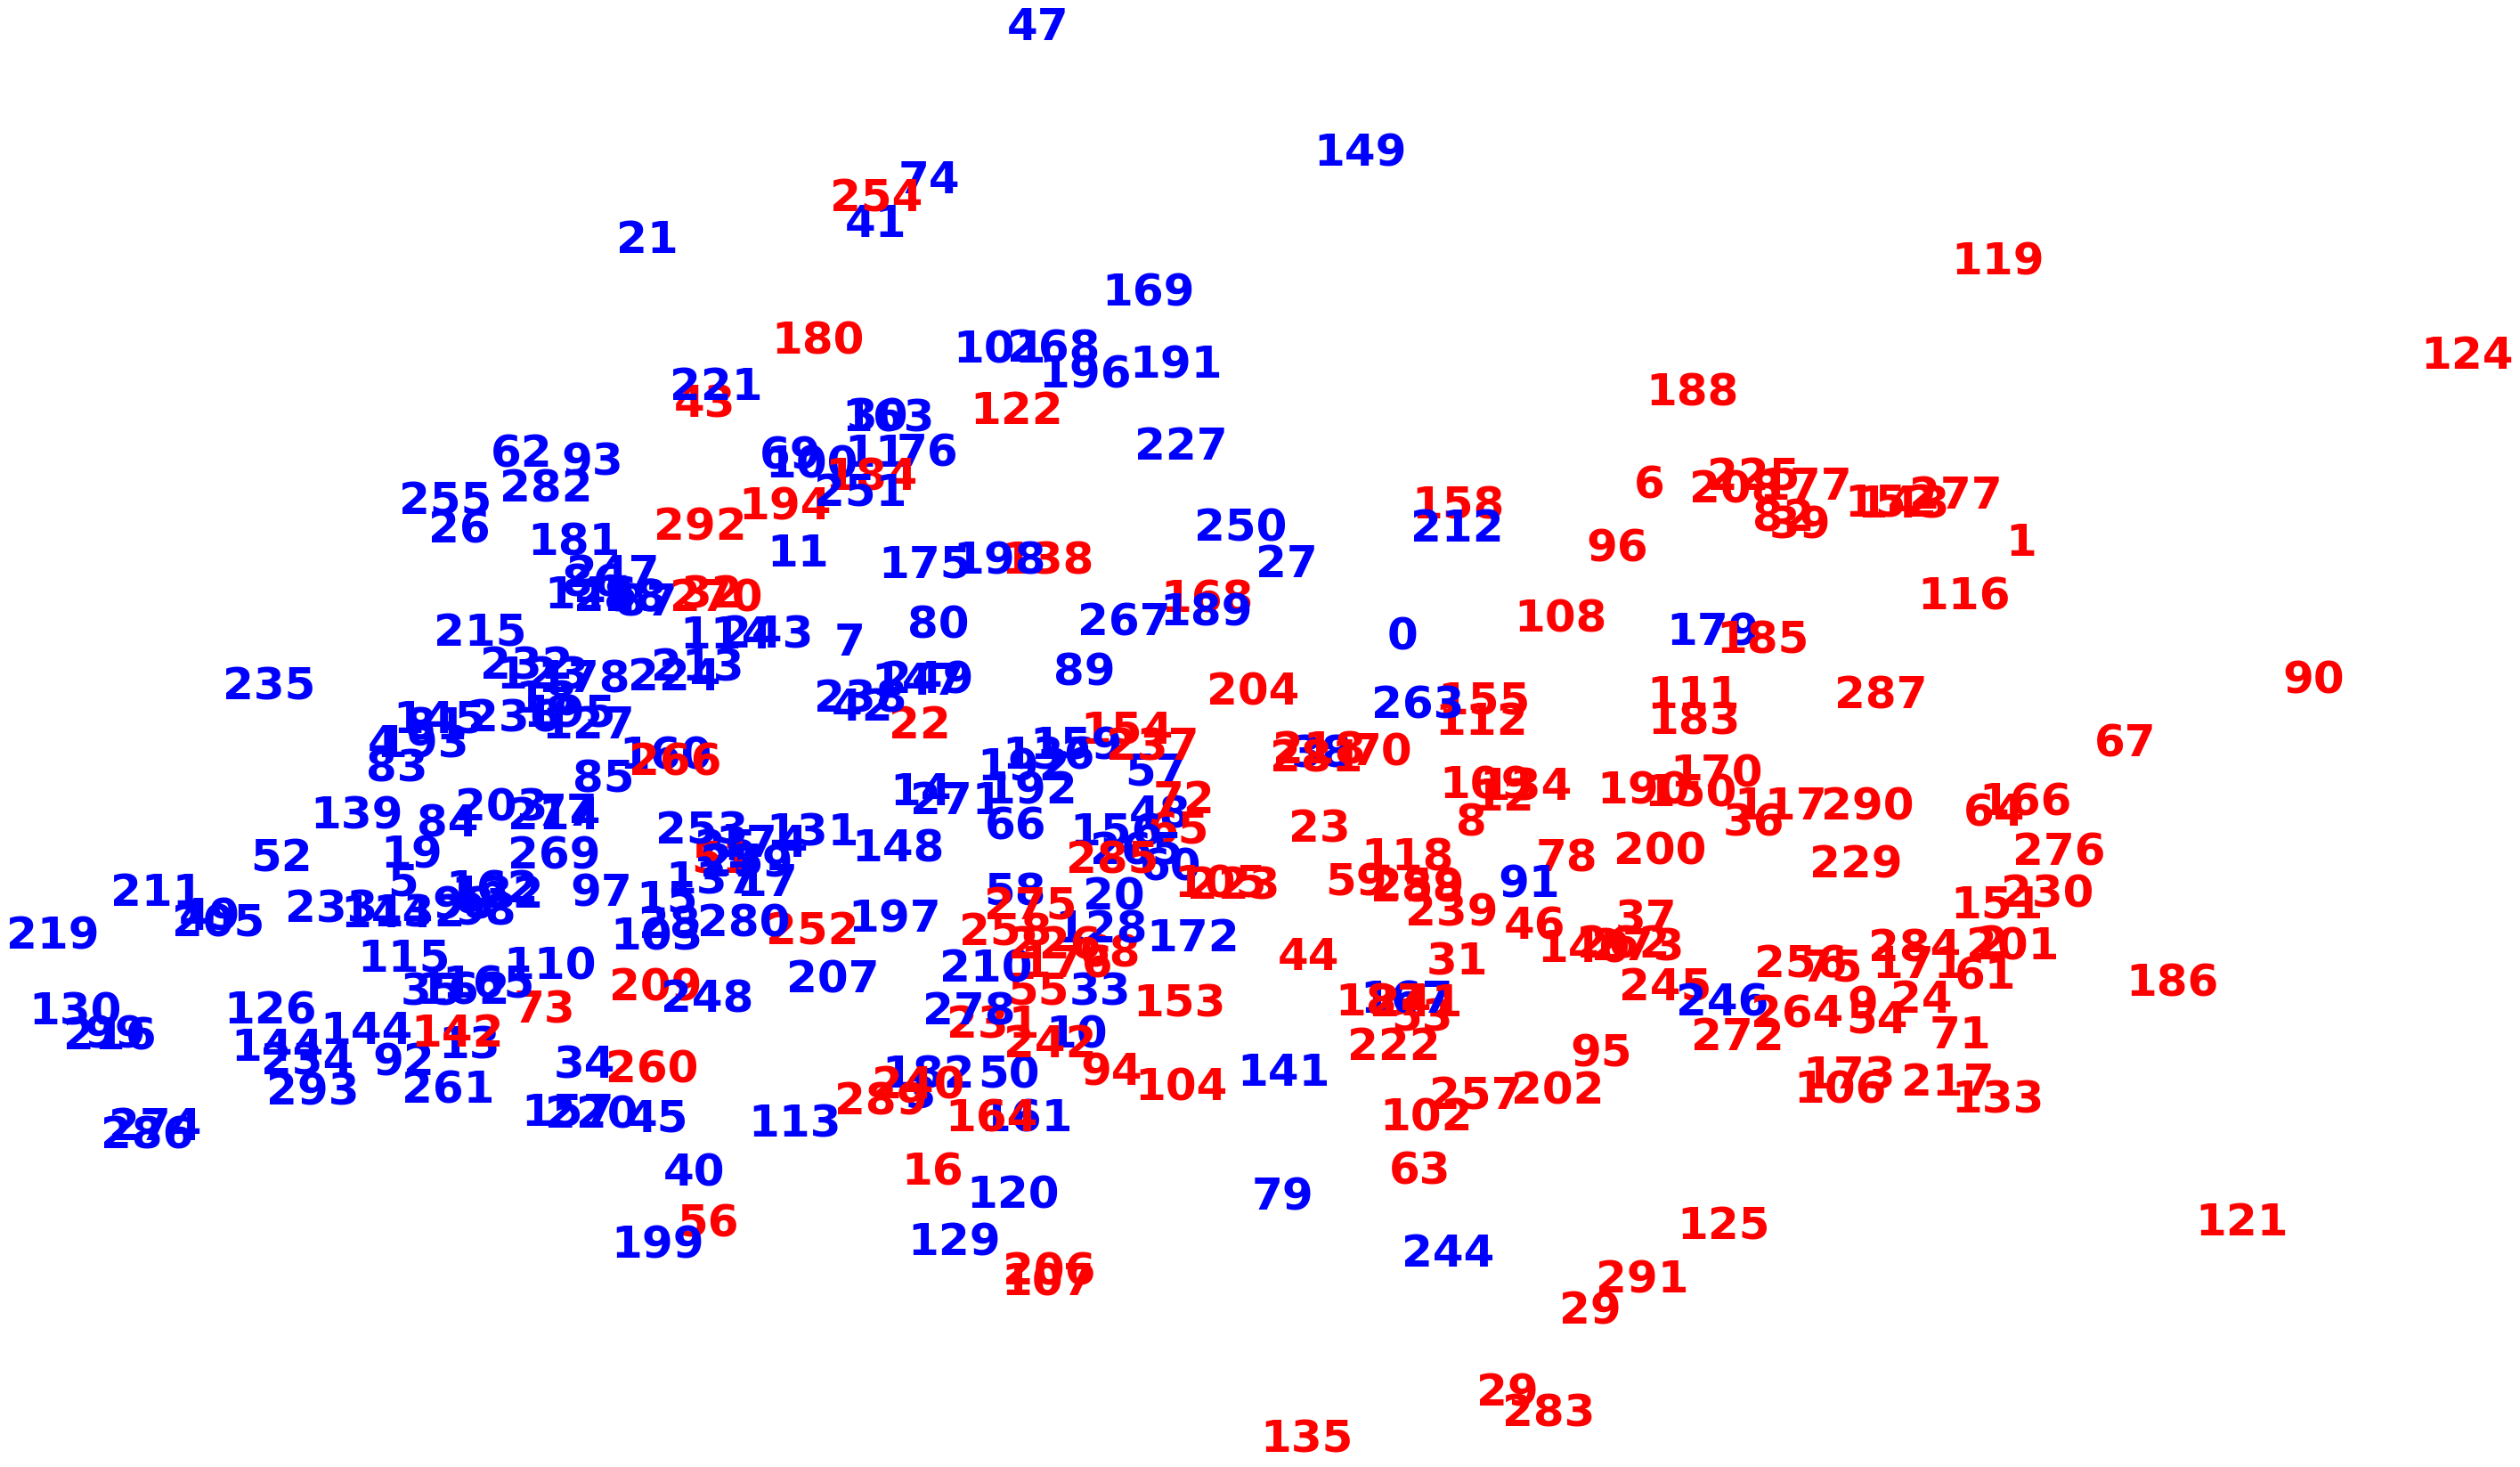

DBSCAN: eps 2 and min_samples 1


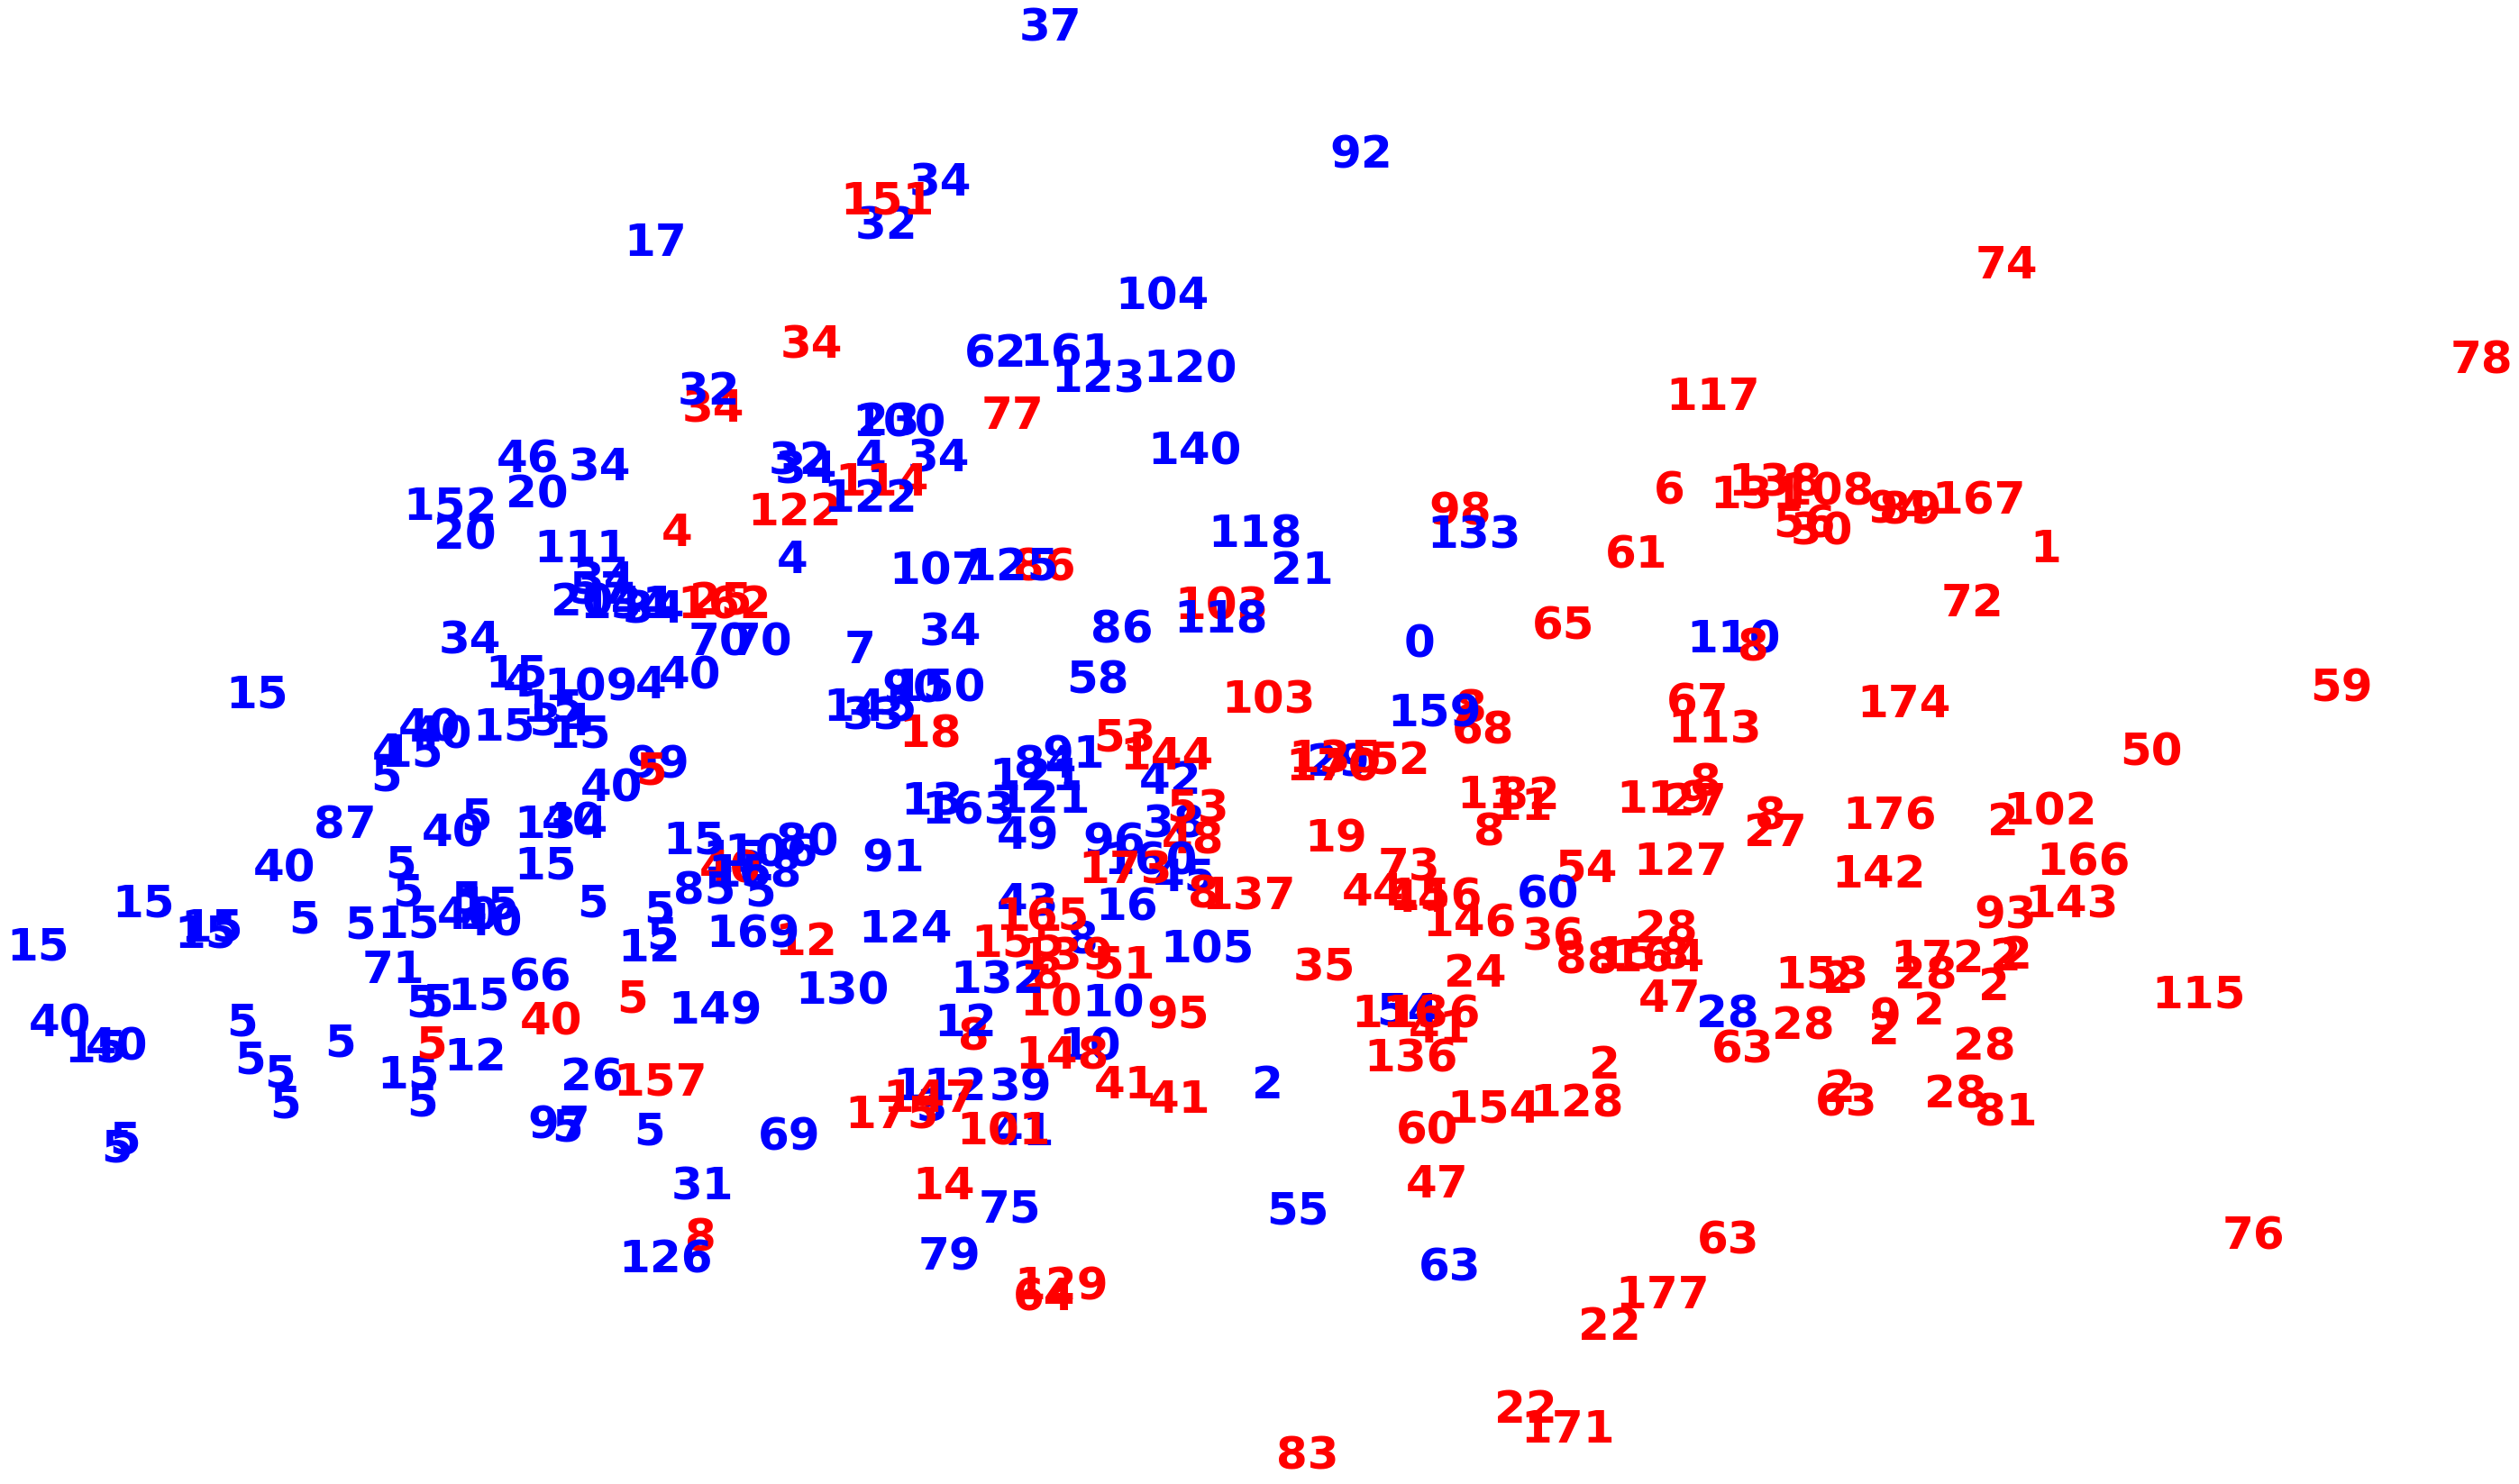

DBSCAN: eps 3 and min_samples 1


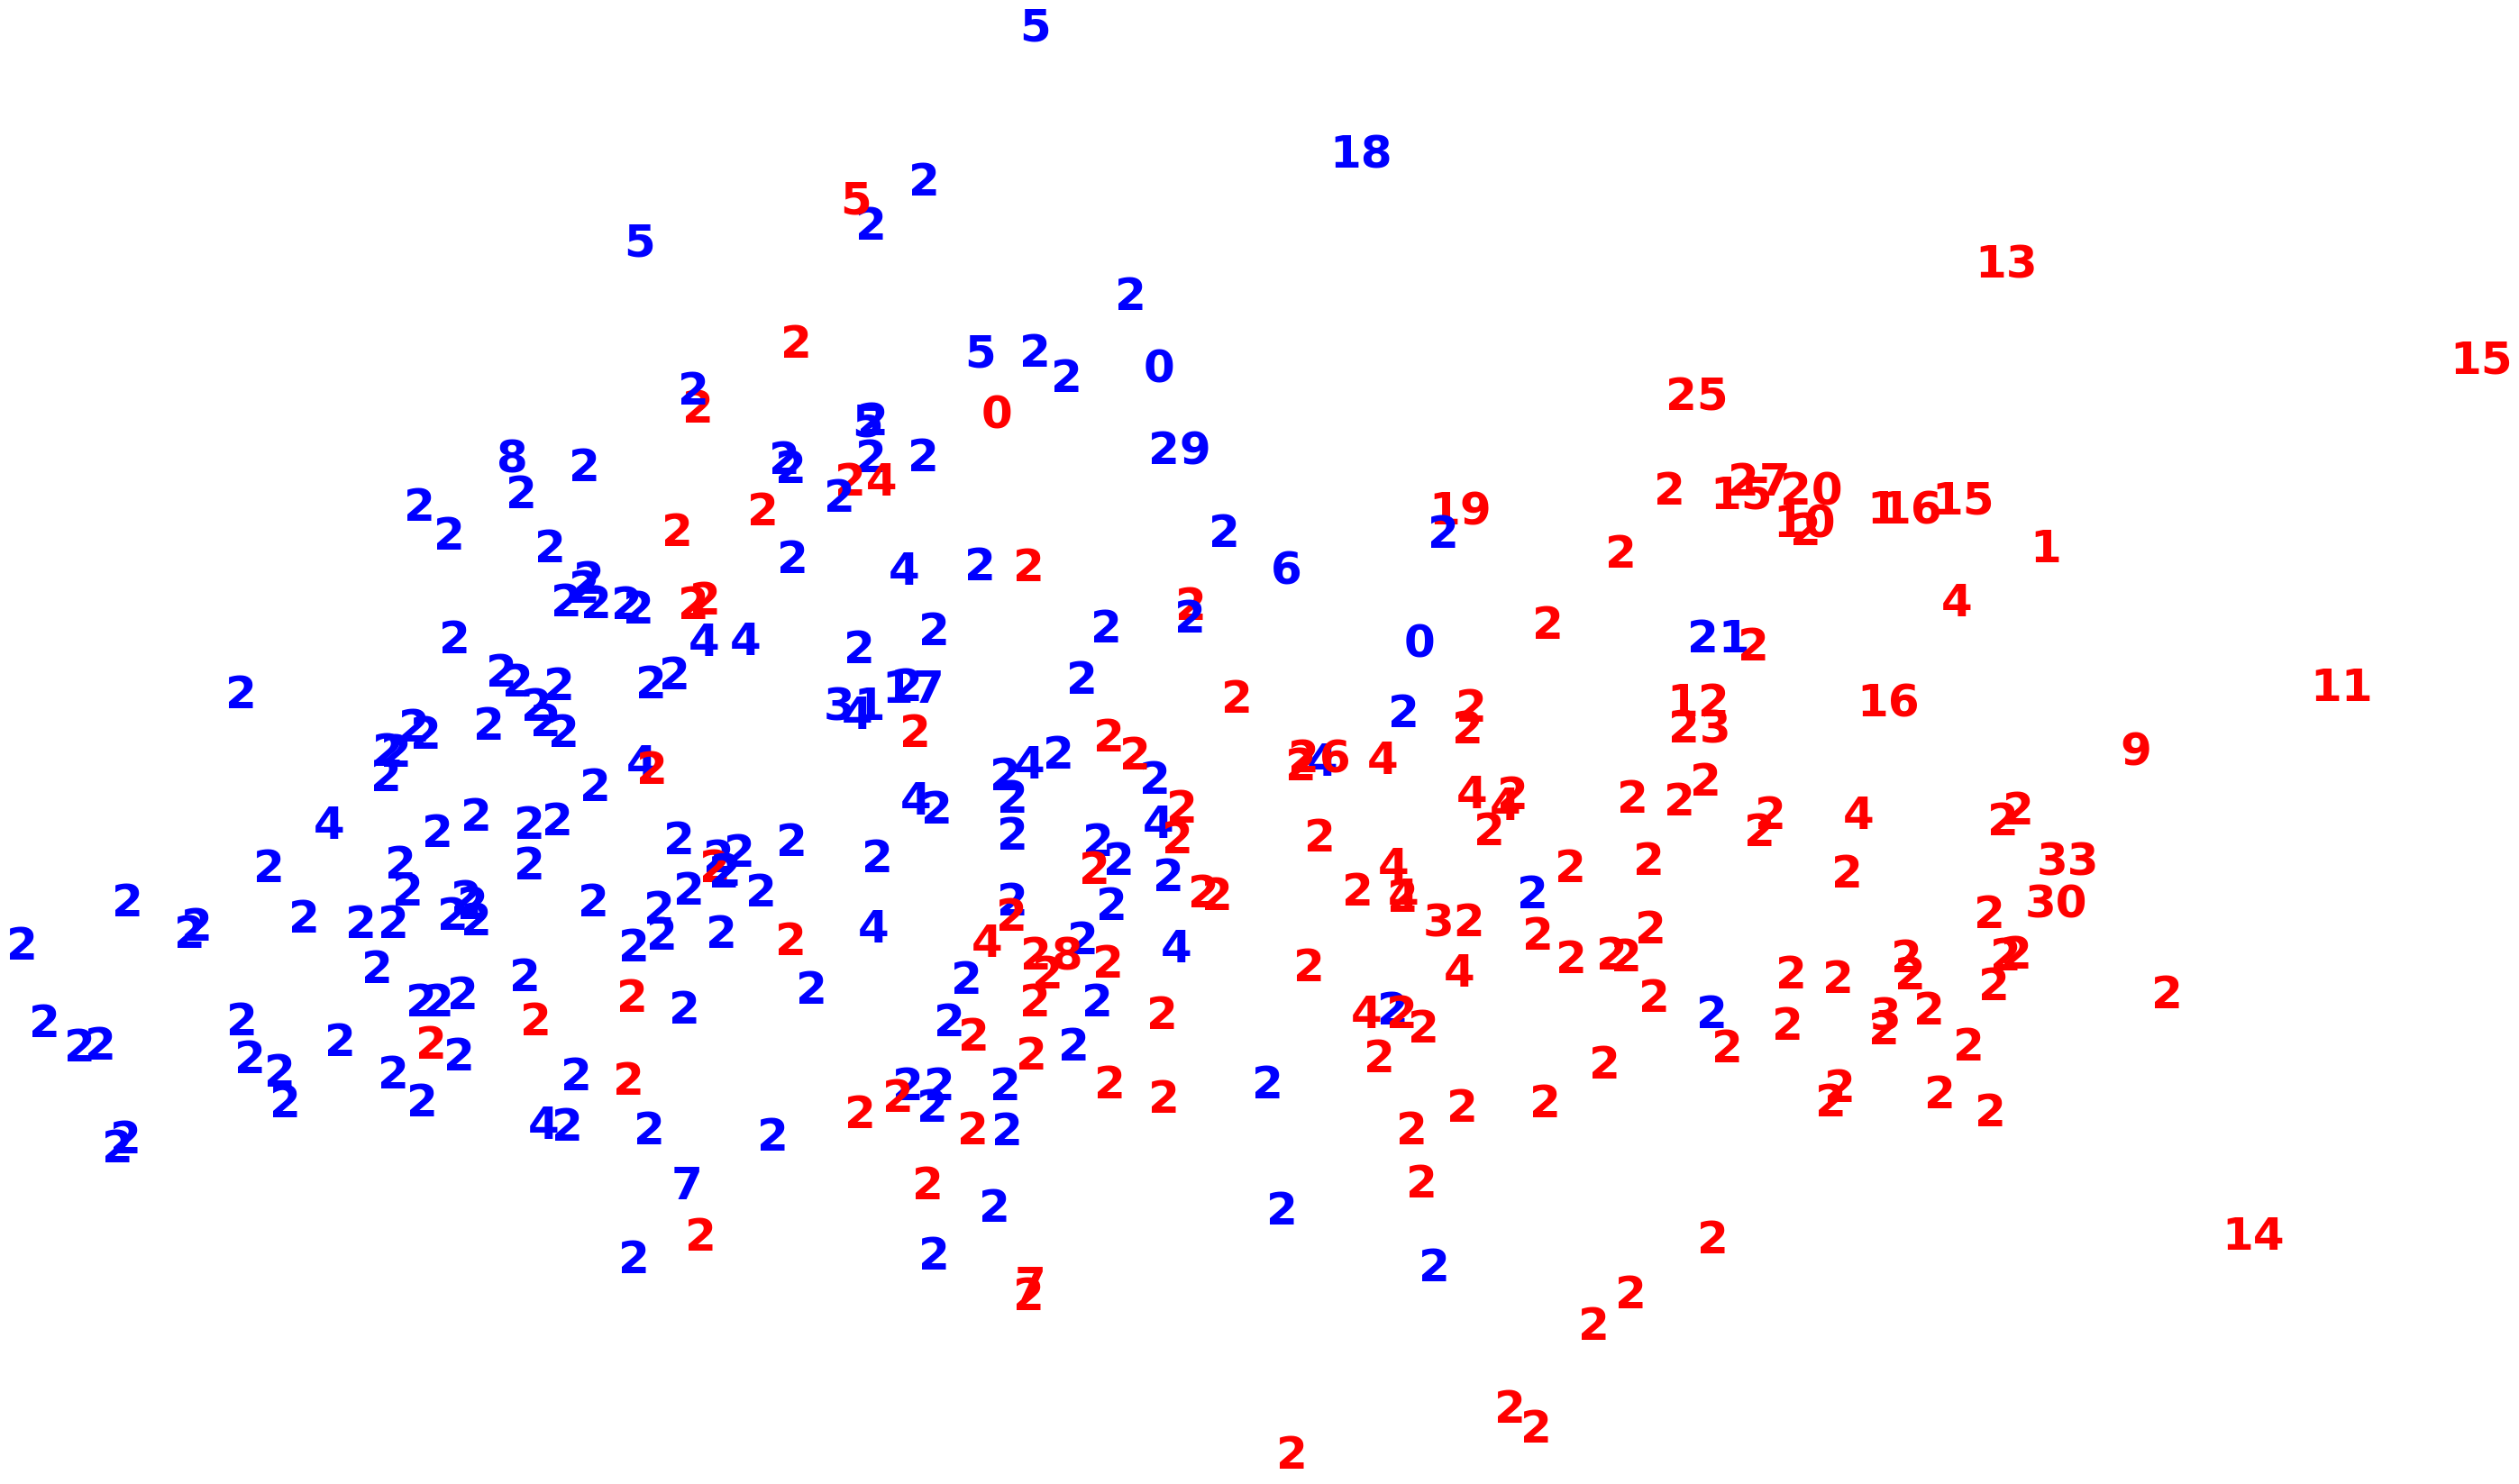

DBSCAN: eps 4 and min_samples 1


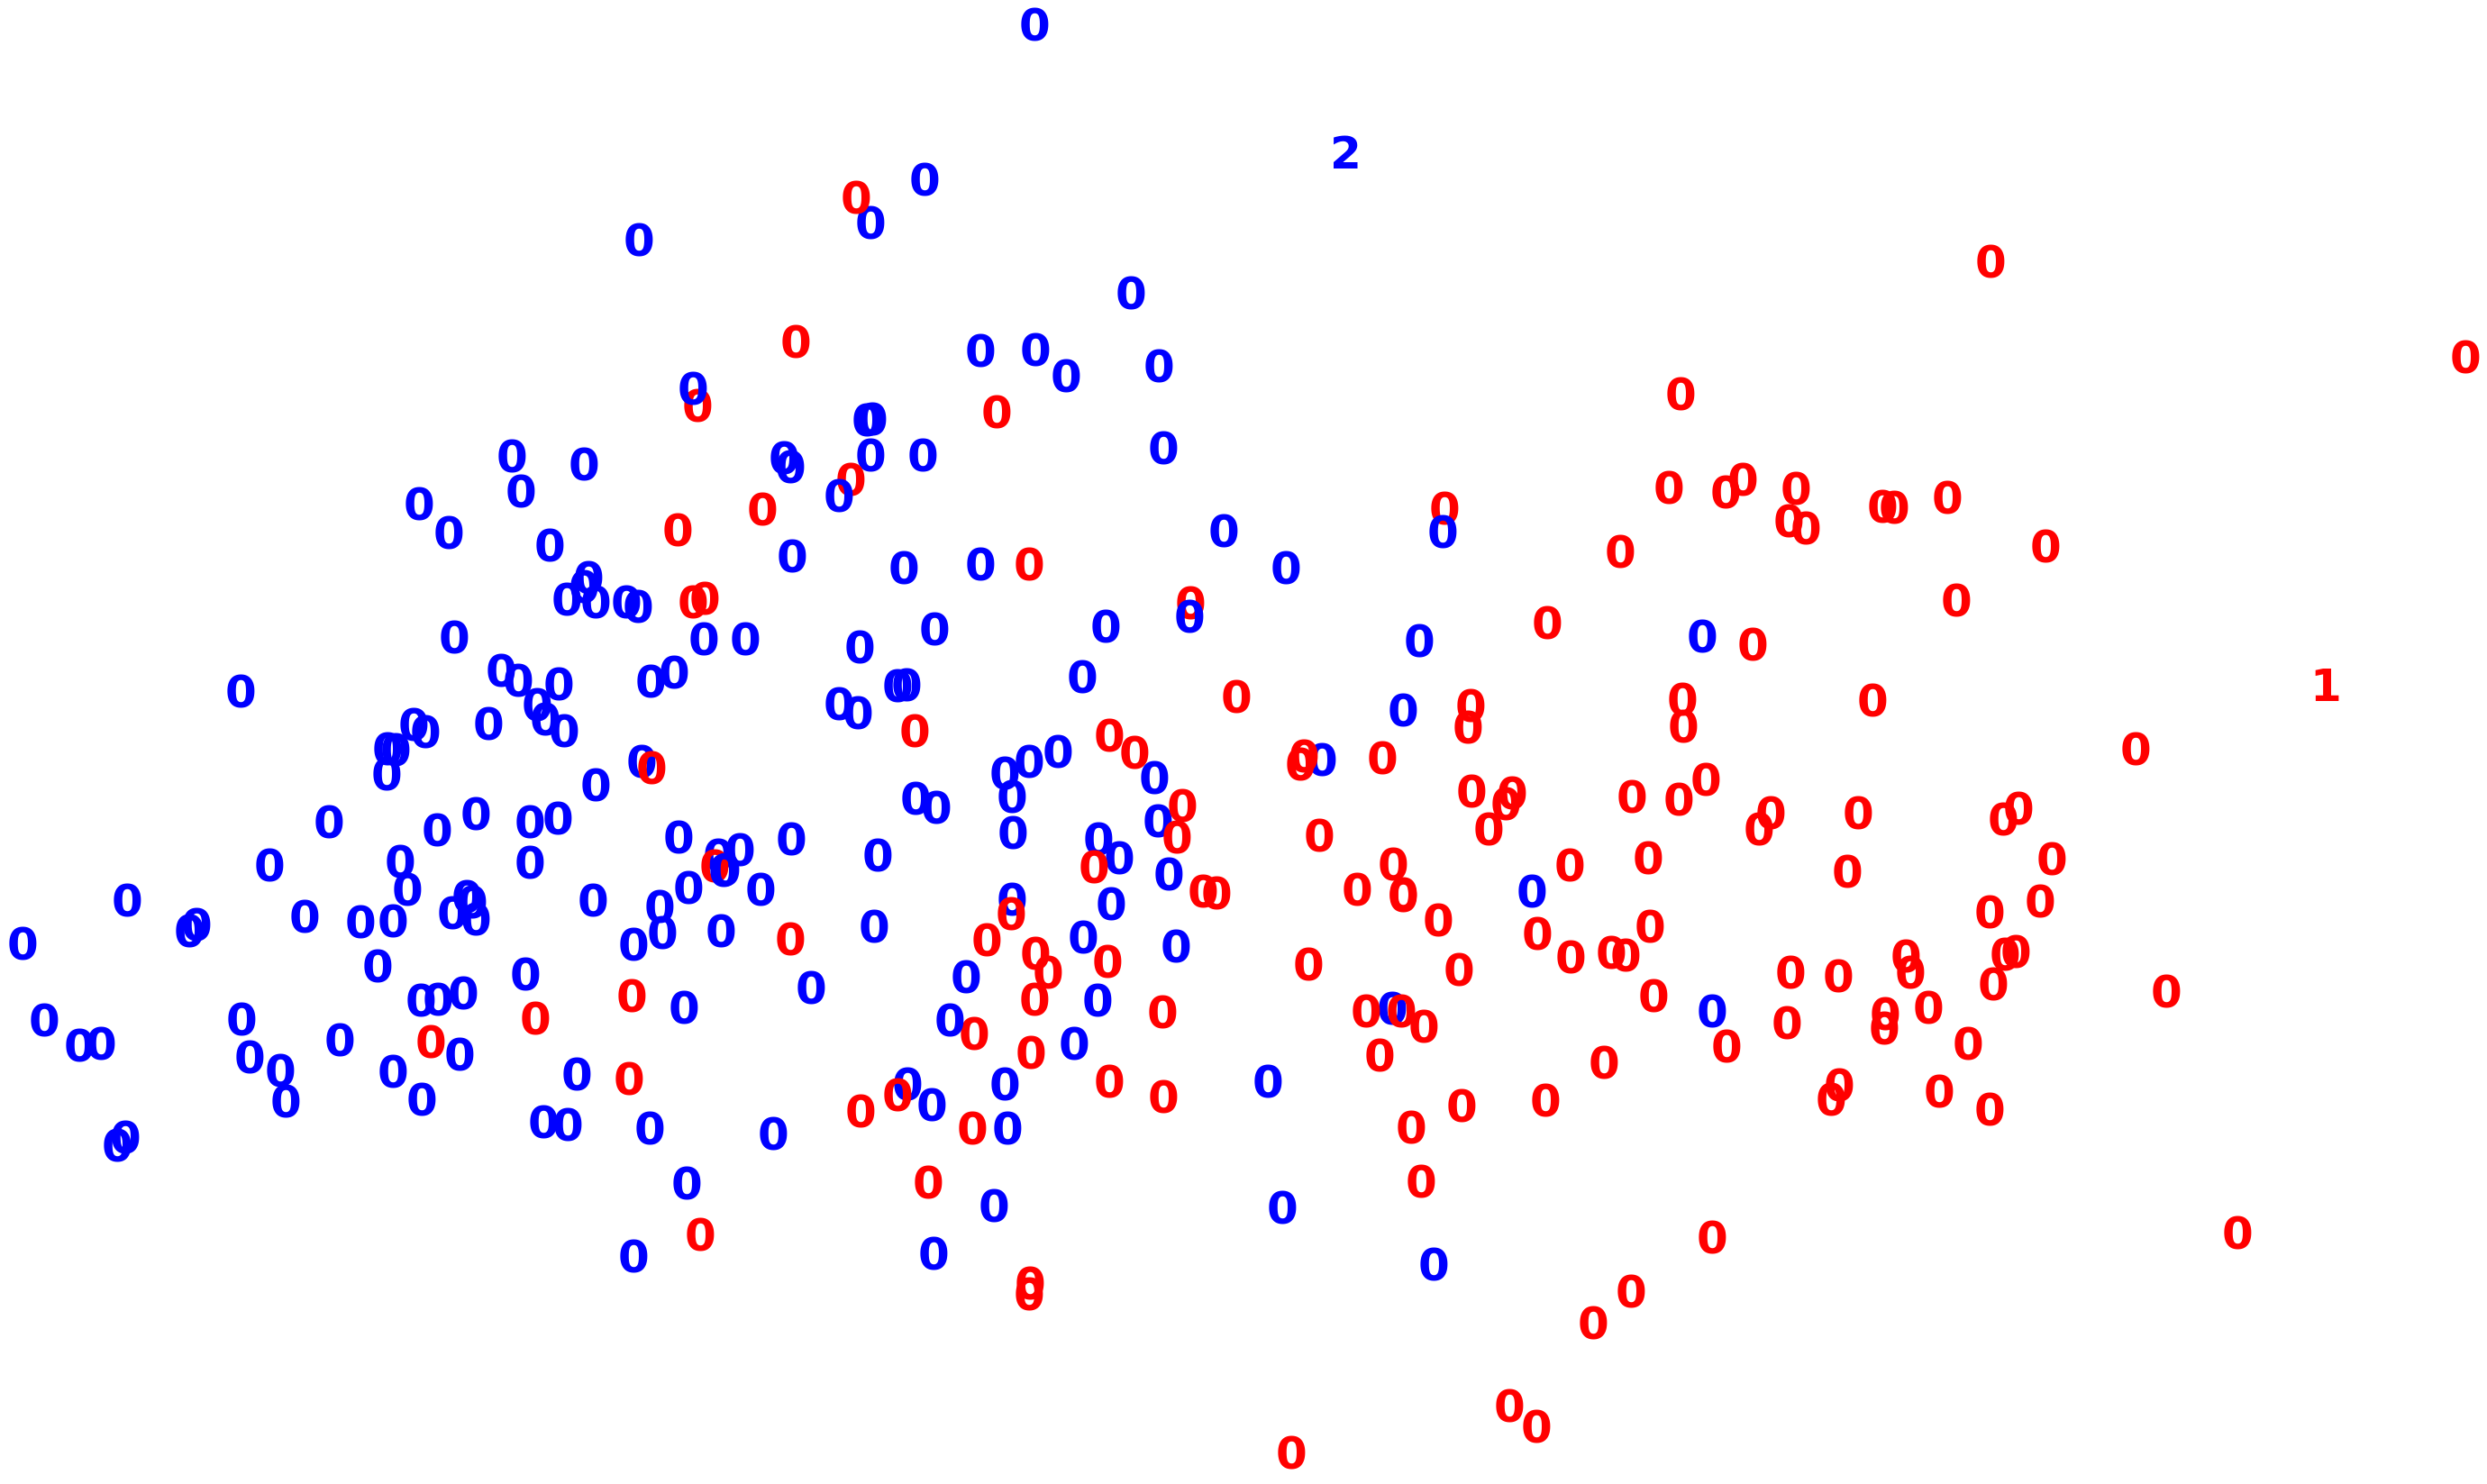

DBSCAN: eps 5 and min_samples 1


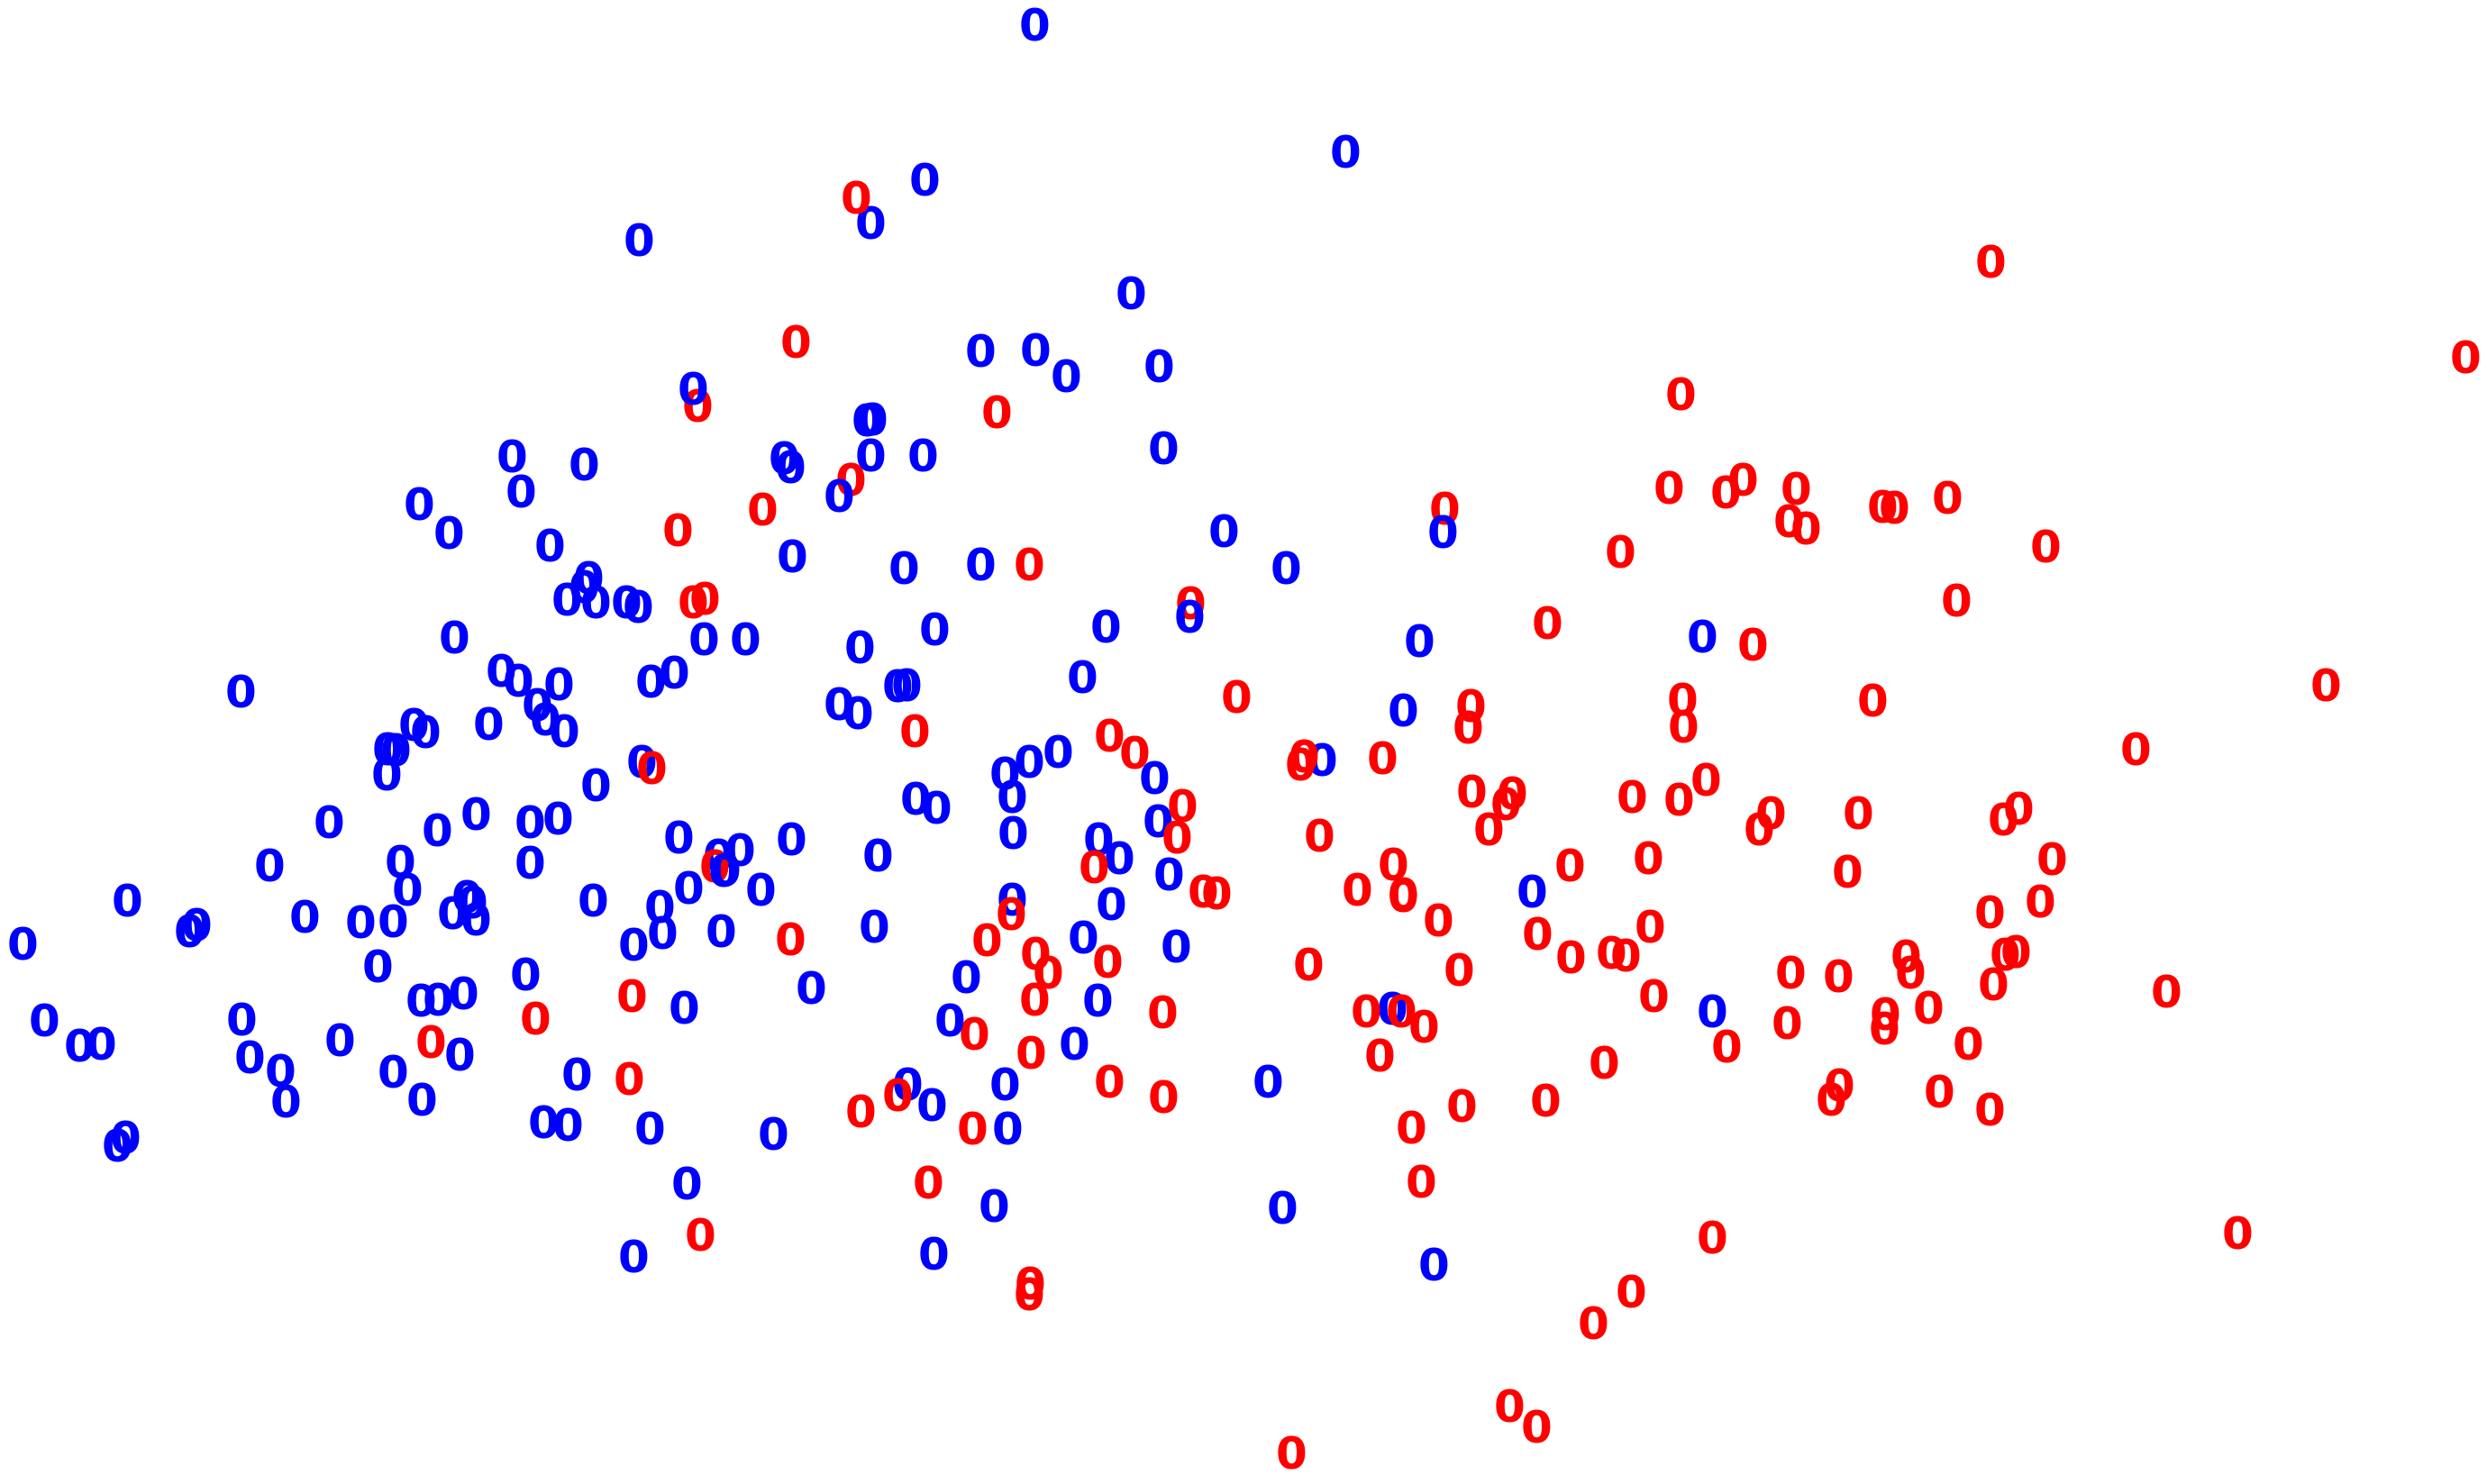

DBSCAN: eps 6 and min_samples 1


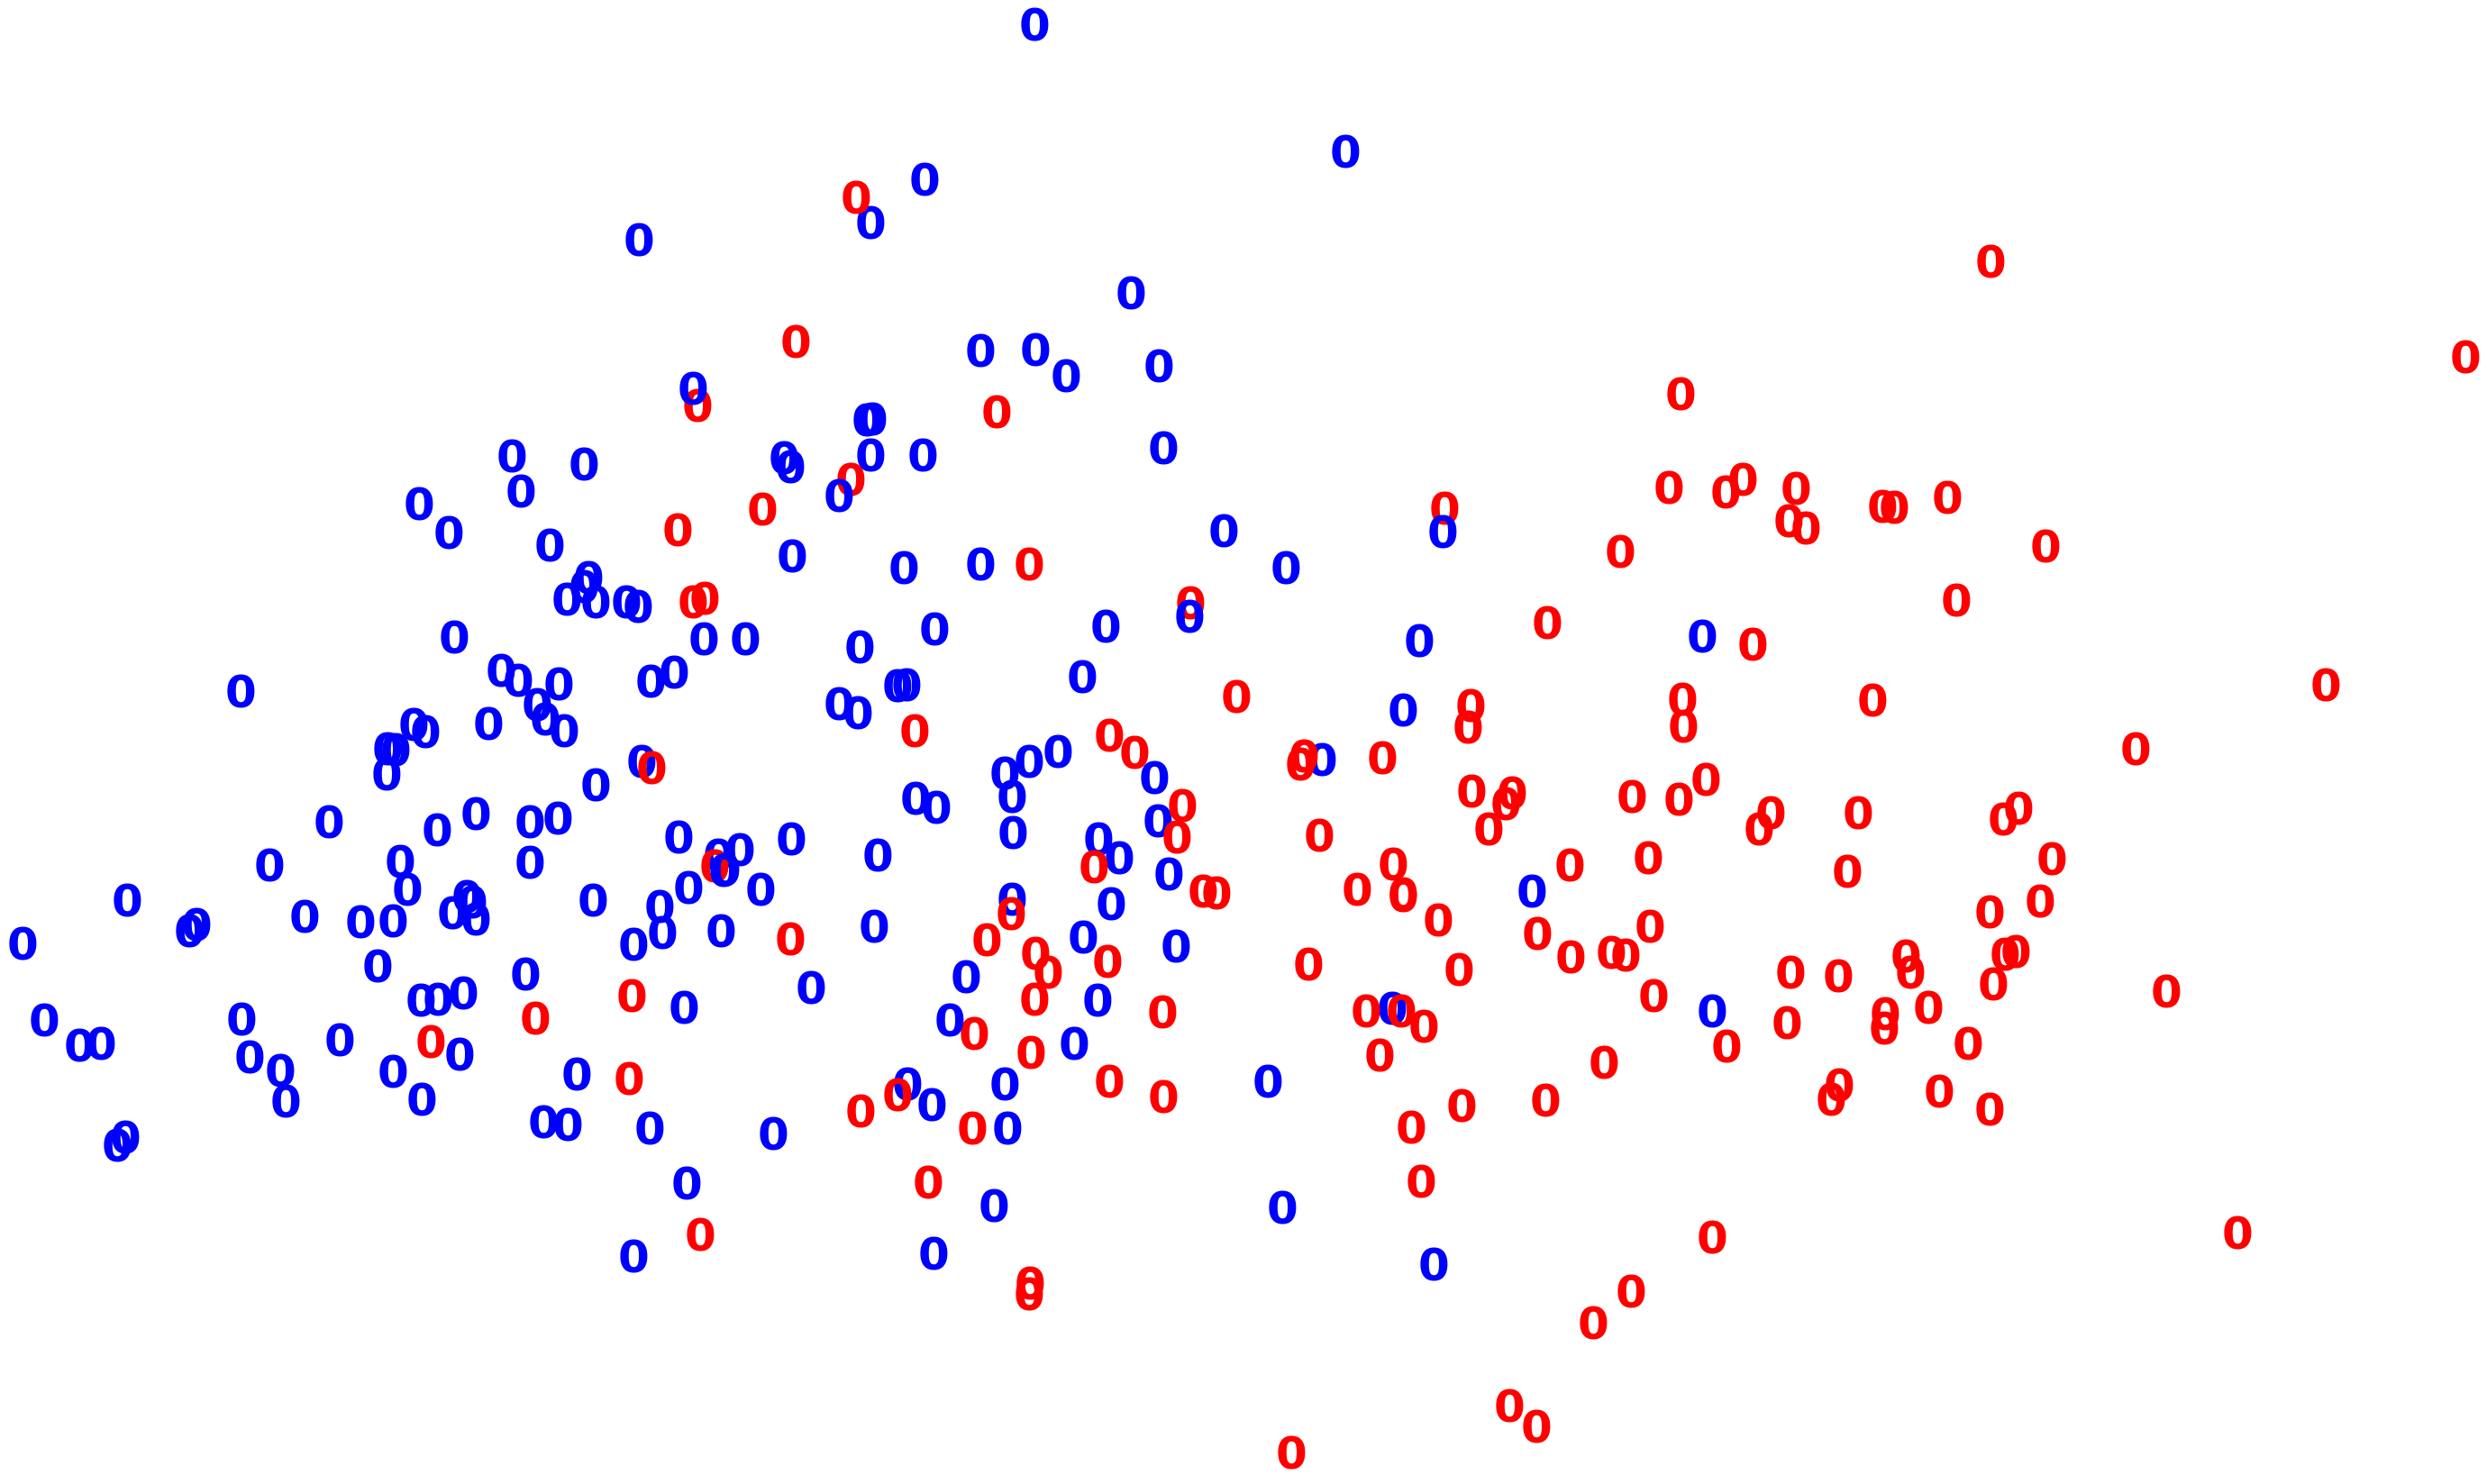

DBSCAN: eps 7 and min_samples 1


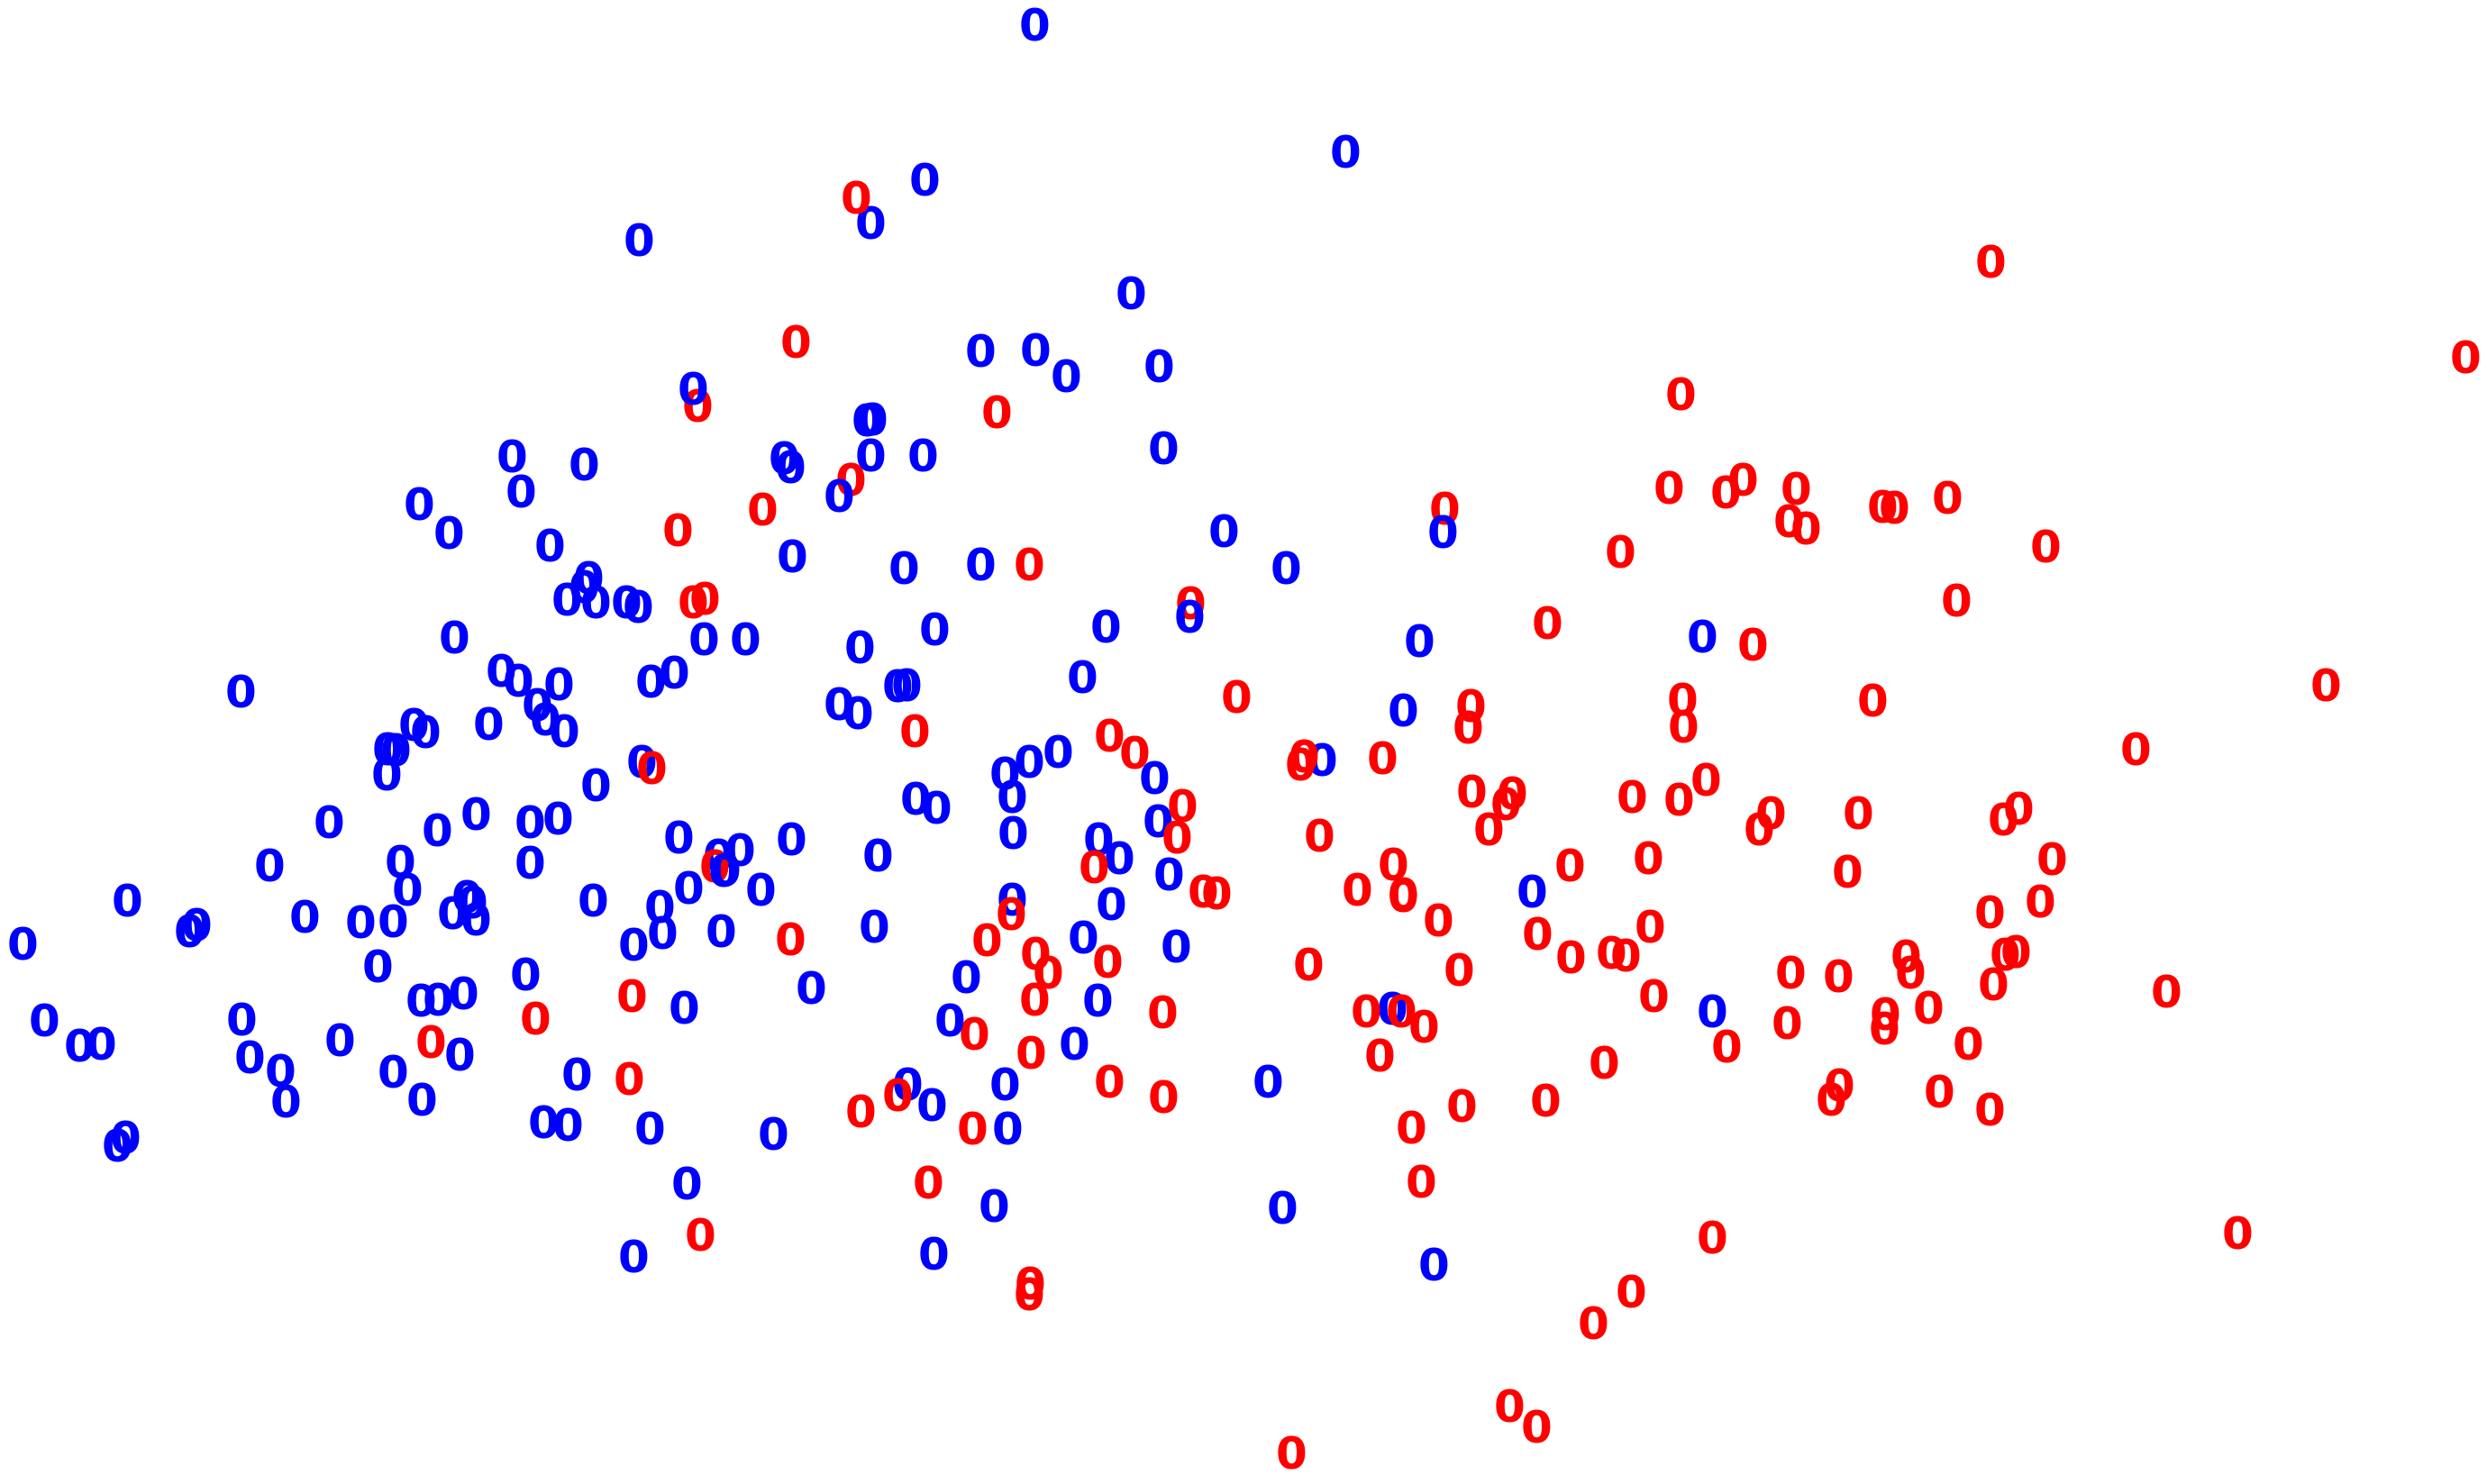

In [10]:
eps = [1, 2, 3, 4, 5, 6, 7]

for eps in eps:

    # Define cluster
    dbscan_cluster = DBSCAN(eps=eps, min_samples=1, metric='euclidean')

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    
    print('DBSCAN: eps {} and min_samples {}'.format(eps, str(1)))
    
    # Visual
    visual(X_std, clusters)

As ```eps``` gradually increases and ```min_samples``` remains constant, we eventually arrive at one cluster for every combination of ```eps``` and ```min_samples```.